In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import utils as ut
random_seed = 42

In [45]:
train_features = pd.read_csv("DOTA2_TRAIN_features.csv")
train_targets = pd.read_csv("DOTA2_TRAIN_targets.csv")
df = train_features.copy()
df["target"] = train_targets["radiant_win"]
df = ut.preprocess_train(df, True, is_split= False)

In [46]:
from collections import defaultdict
def get_columns_groups(data : pd.DataFrame):
    cats = defaultdict(list)
    for col in data.columns:
        if col != 'target':
            is_find = False
            for i in range(5):
                if ("r"+str(i+1)) in col:
                    cats["r"+str(i+1)].append(col)
                    is_find = True
                elif ("d"+str(i+1)) in col:
                    cats["d"+str(i+1)].append(col)
                    is_find = True
            if not is_find:
                cats["other"].append(col)
    return dict(cats)

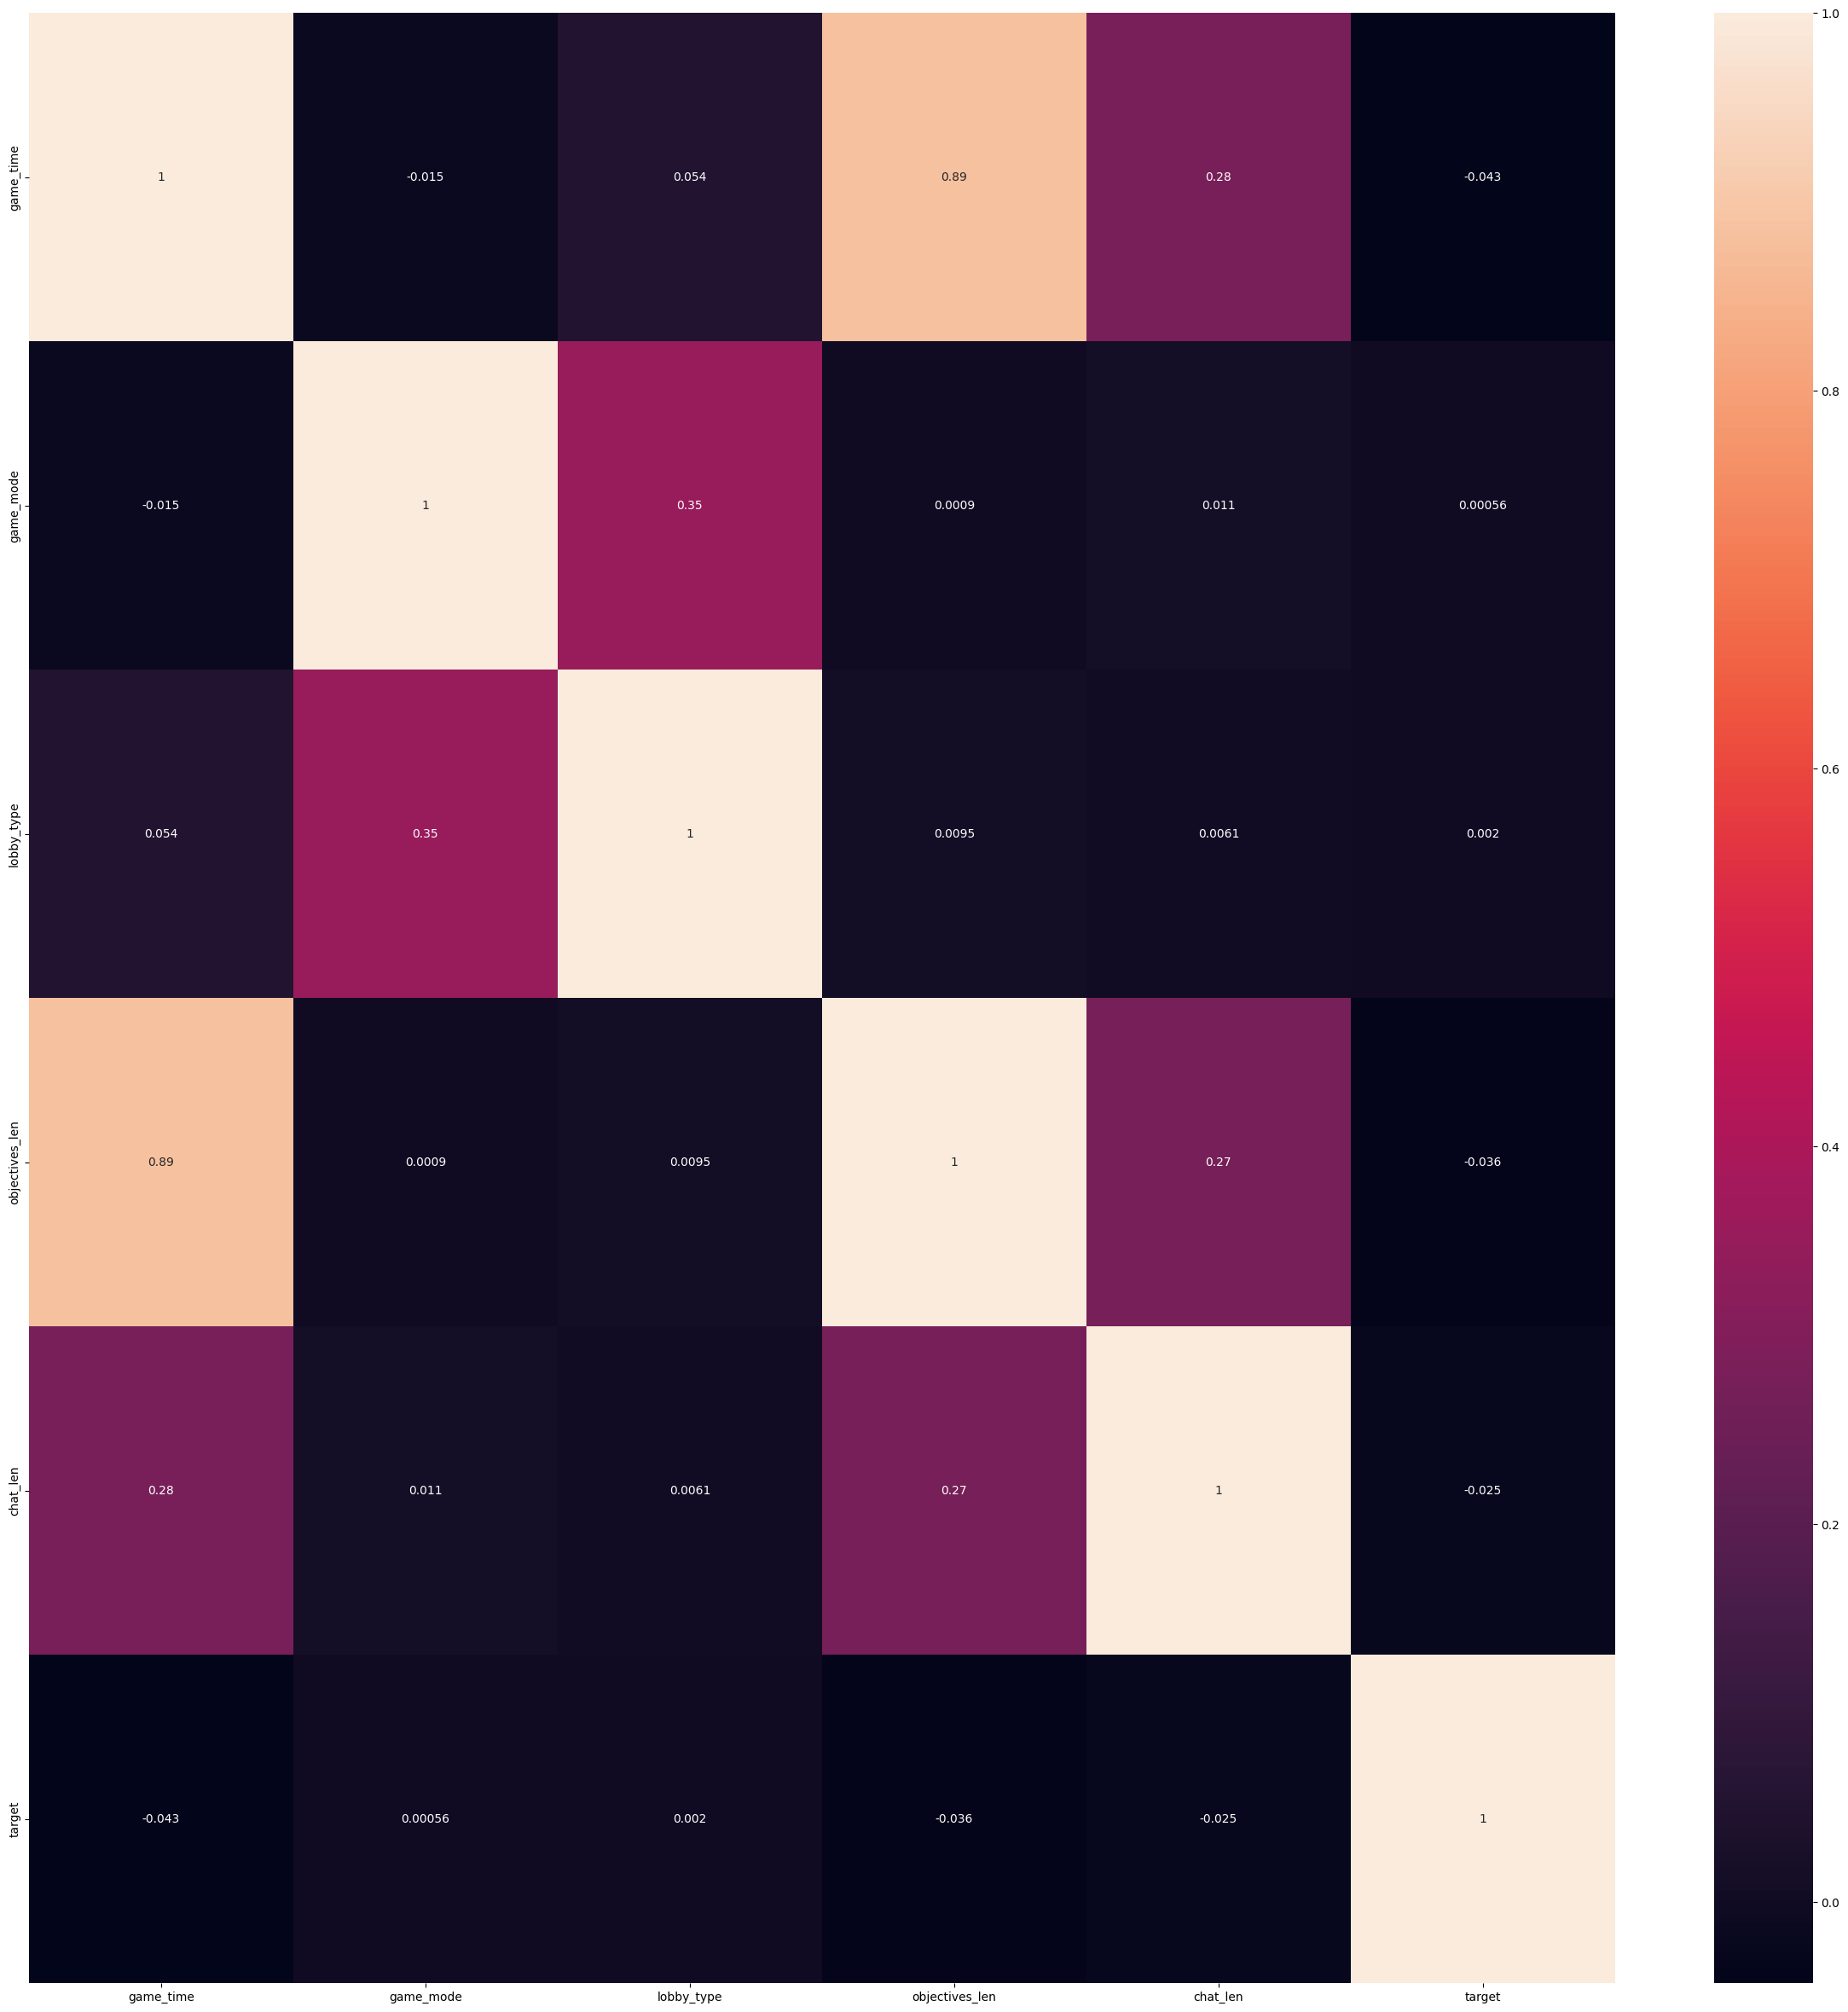

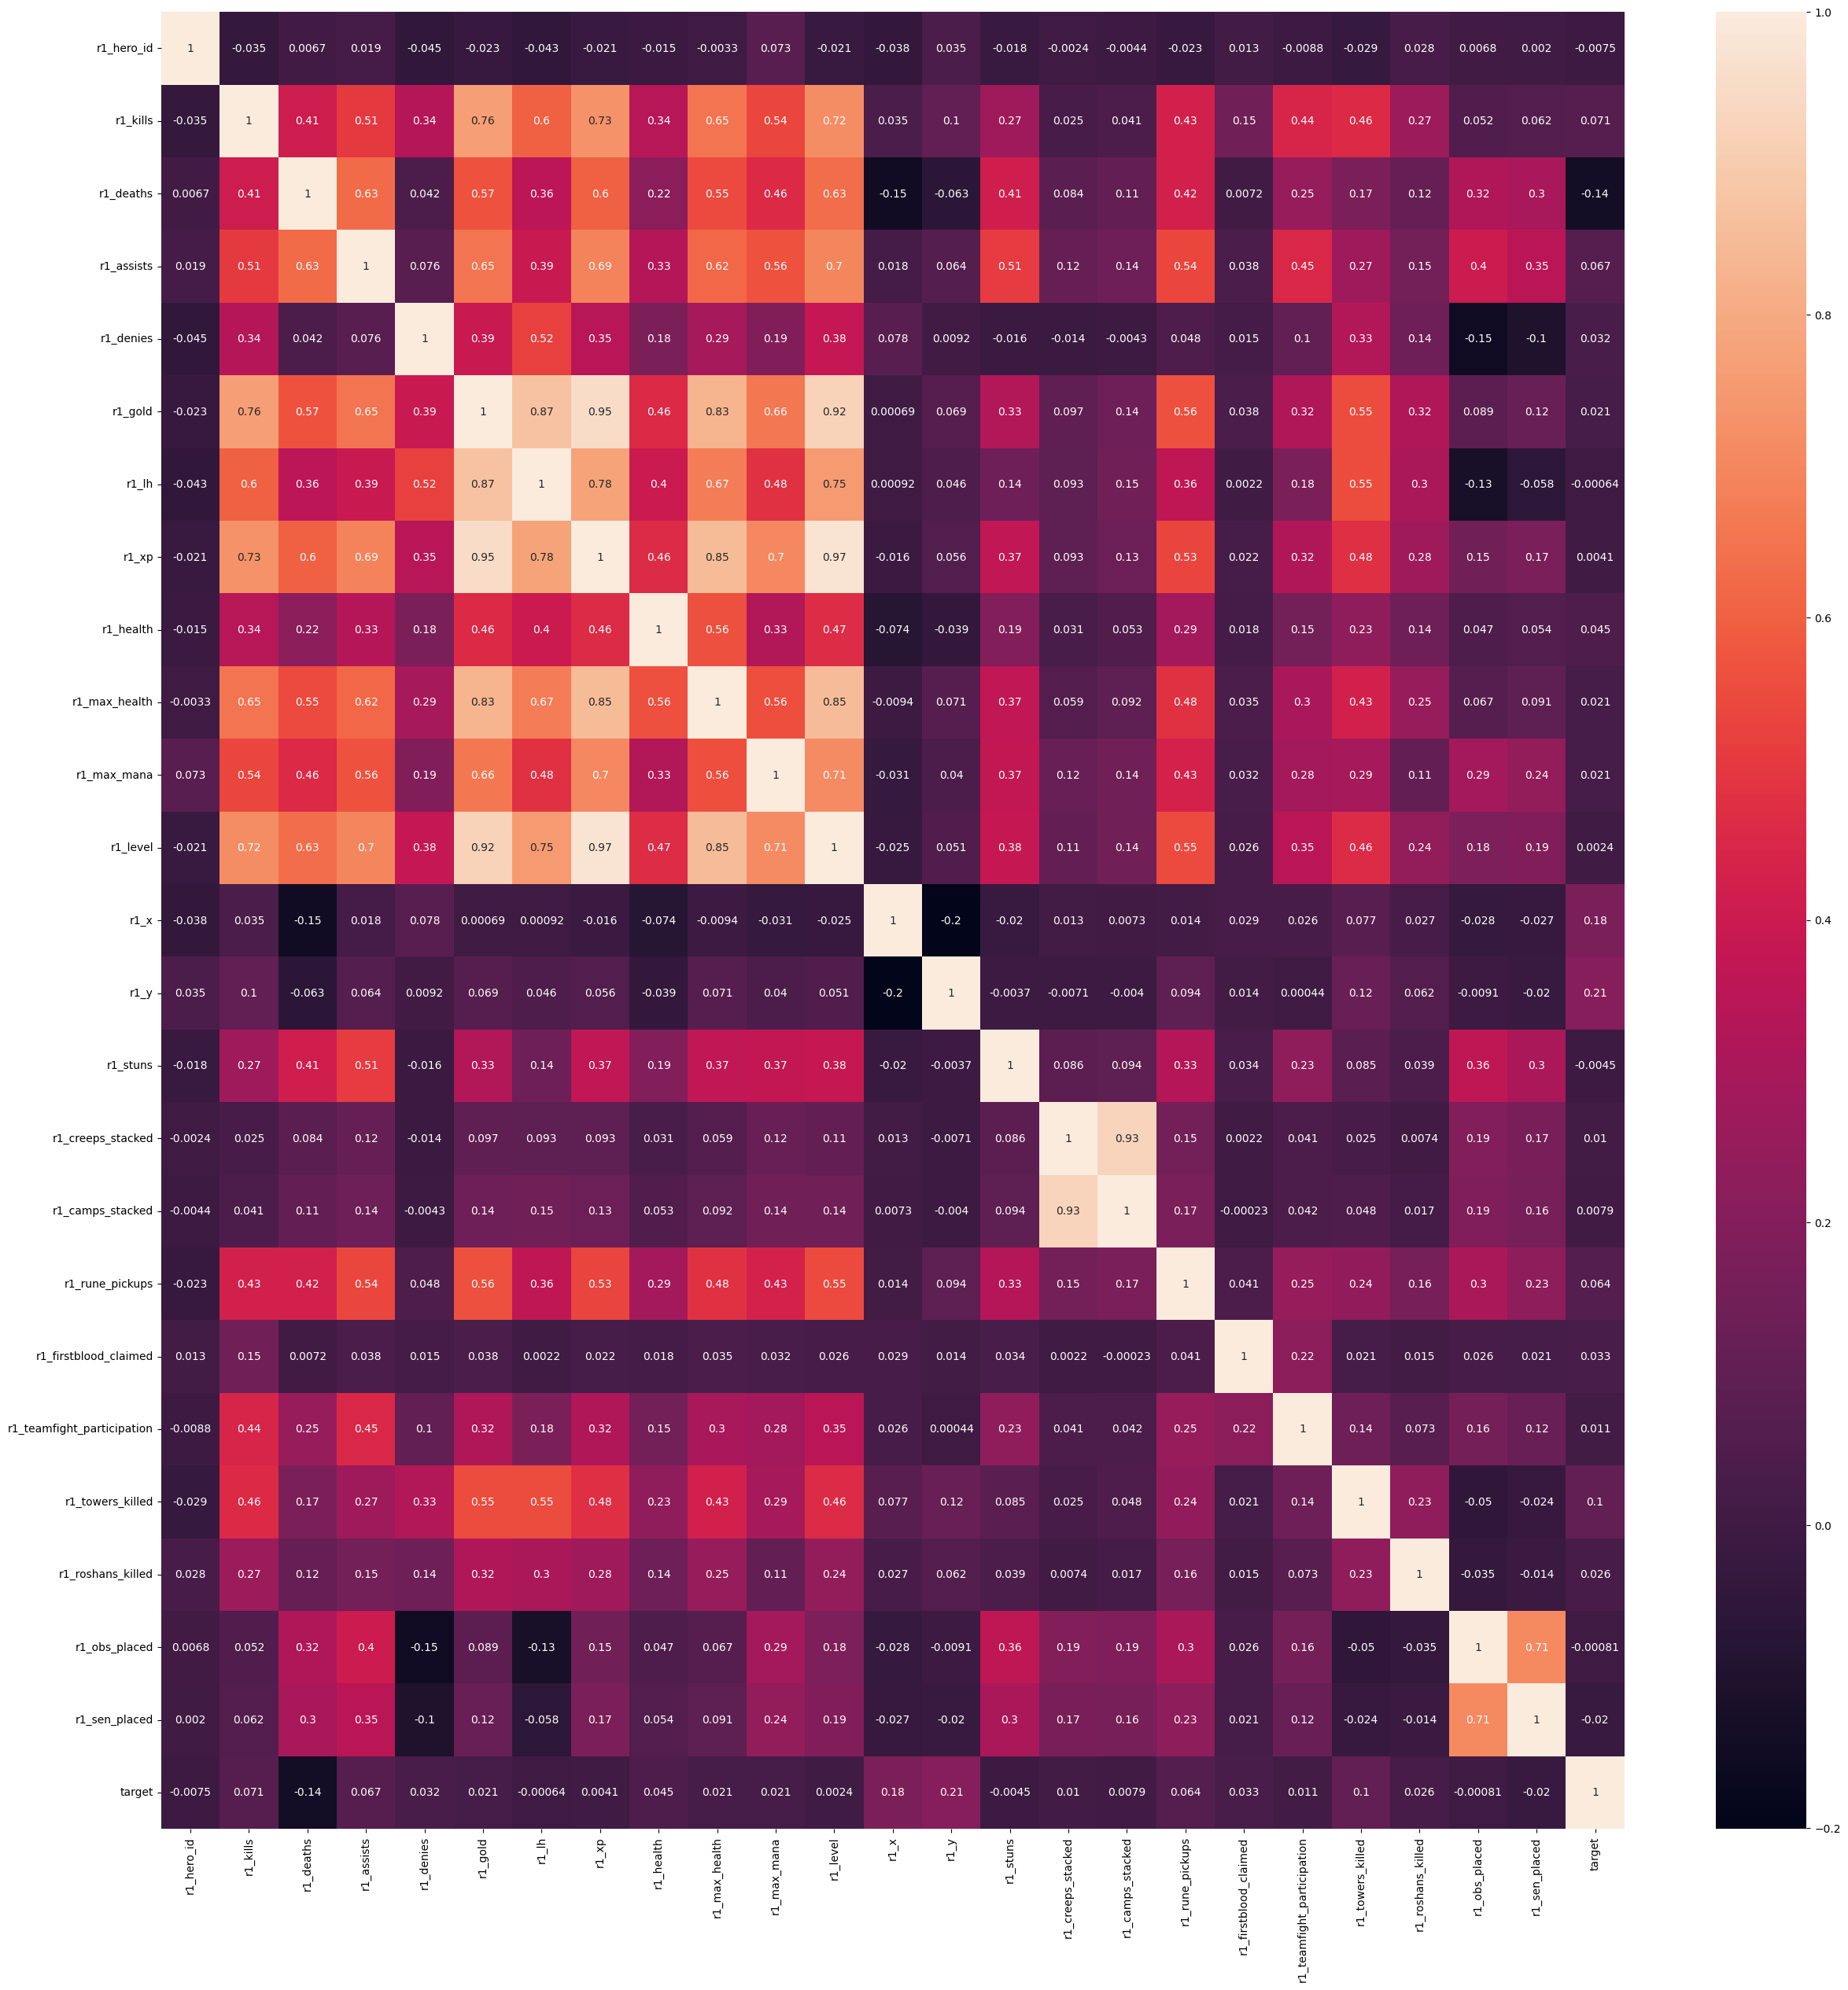

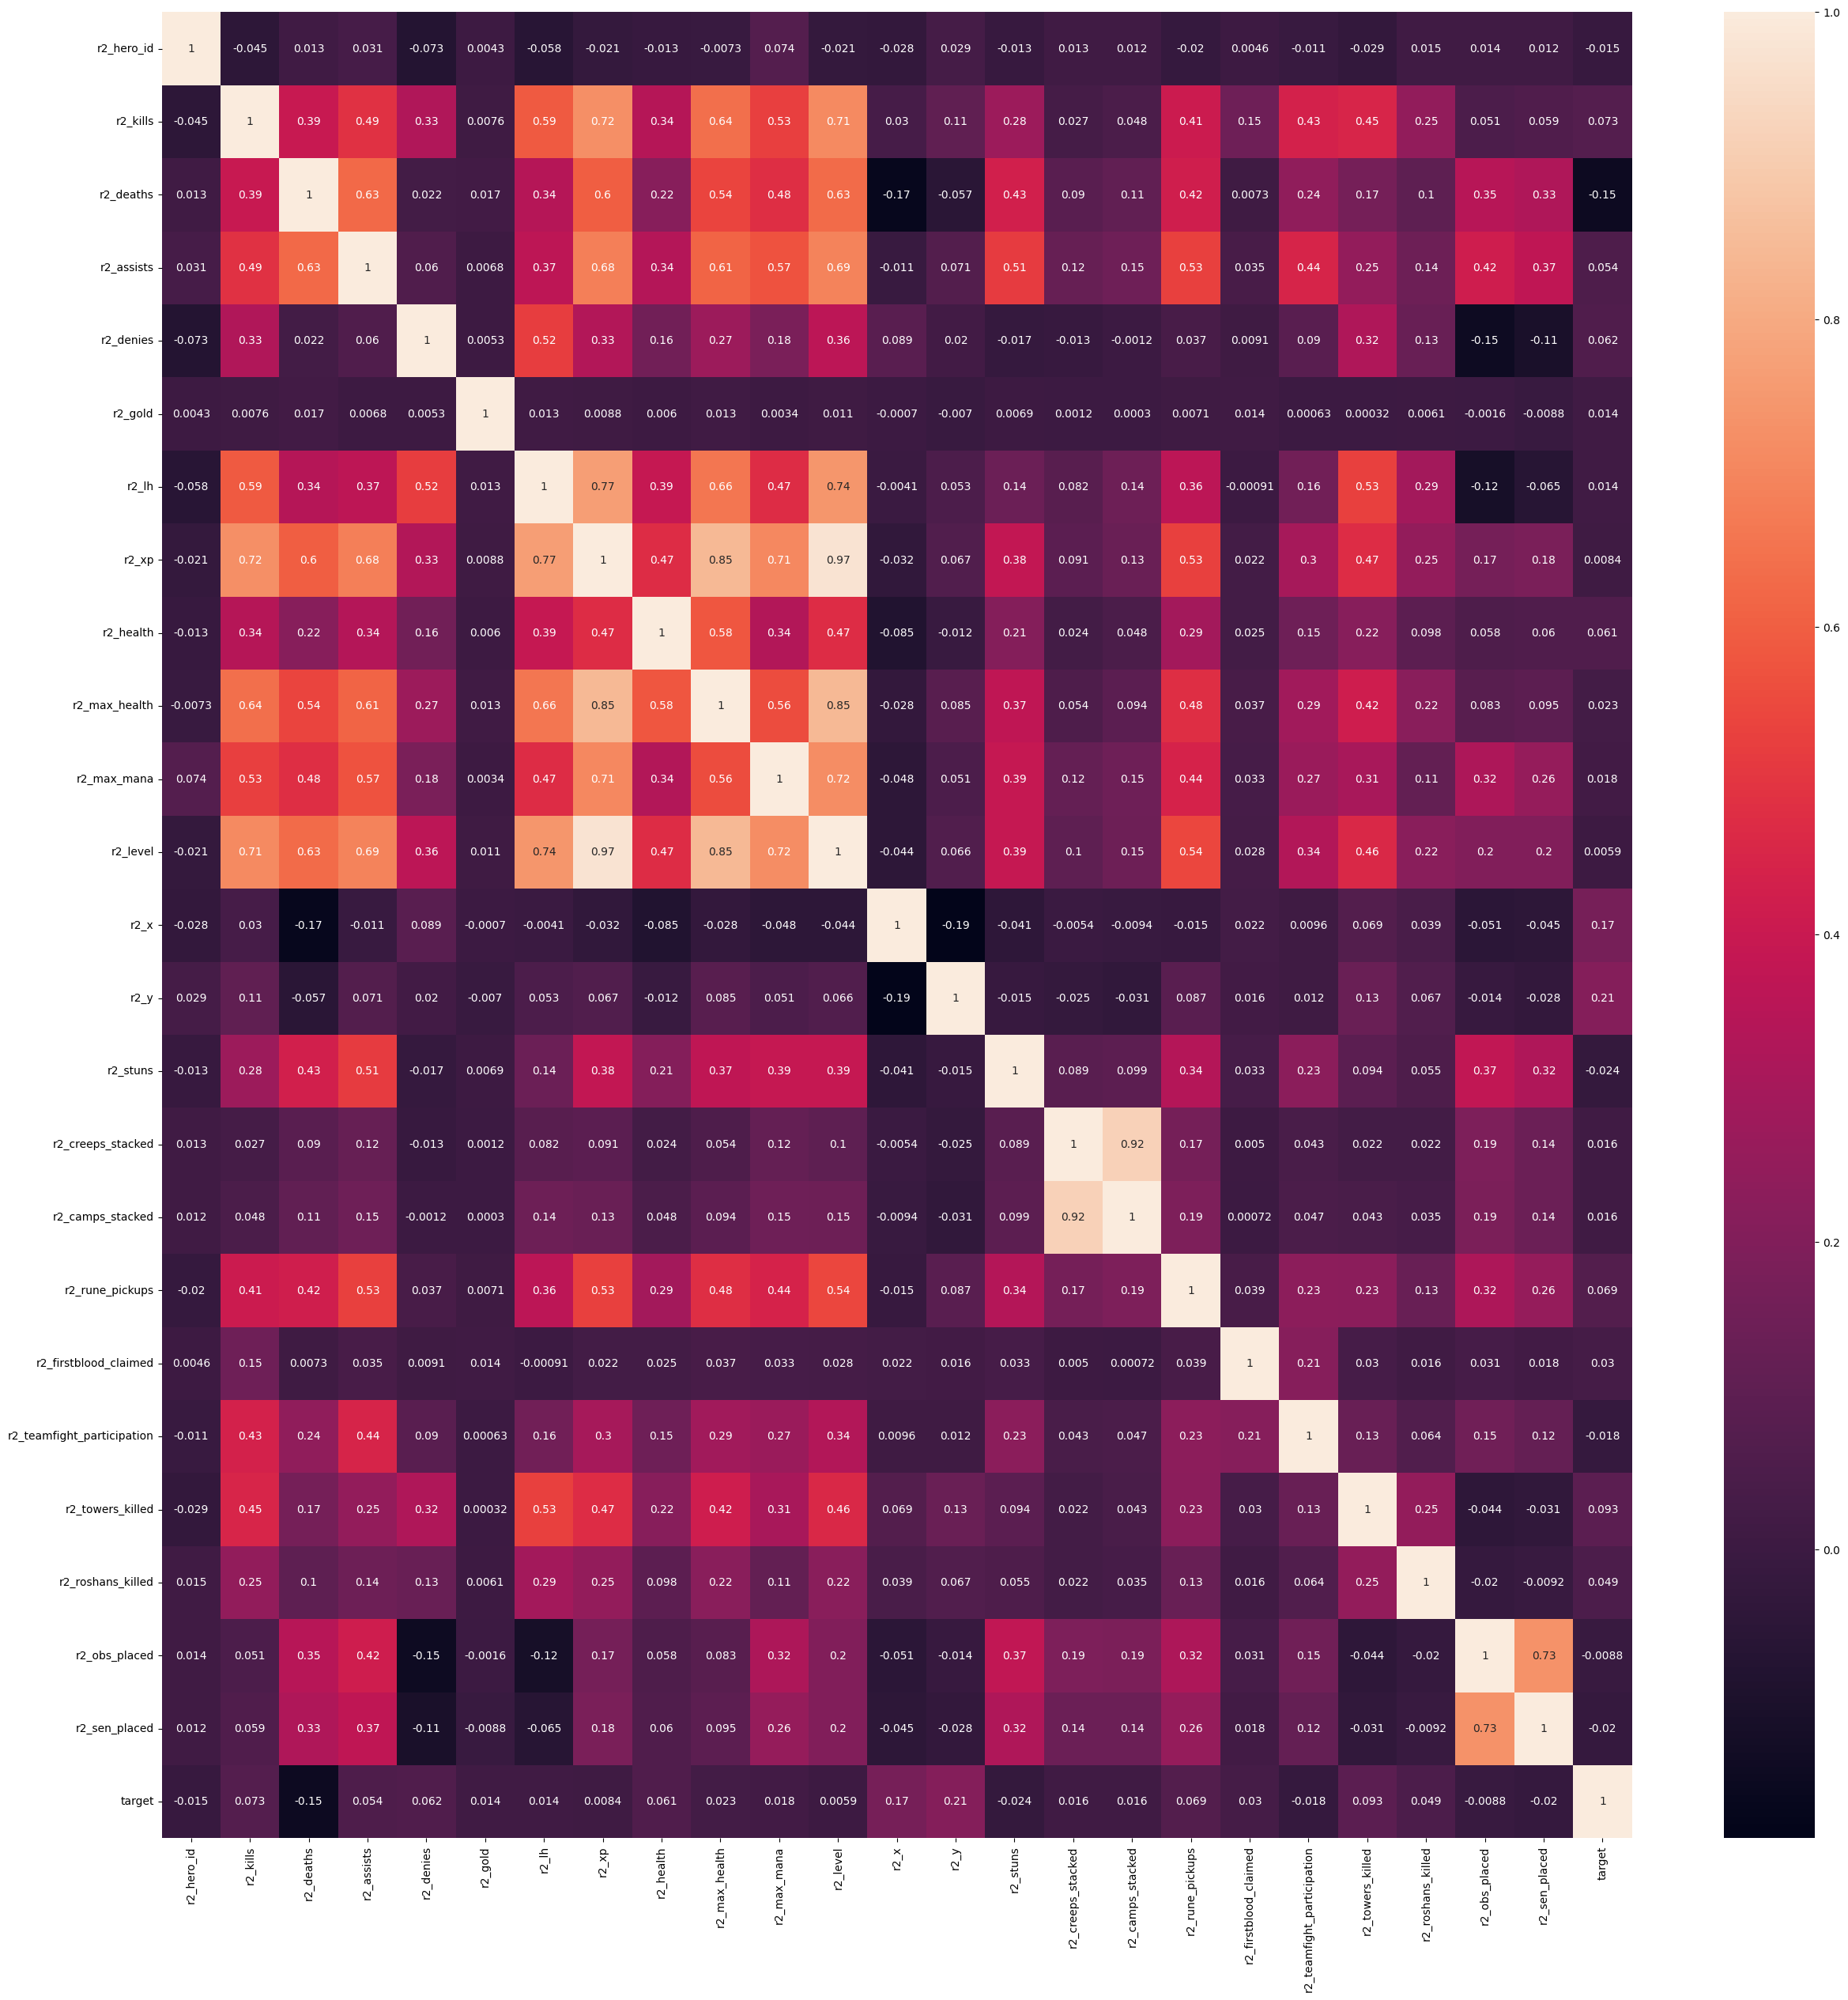

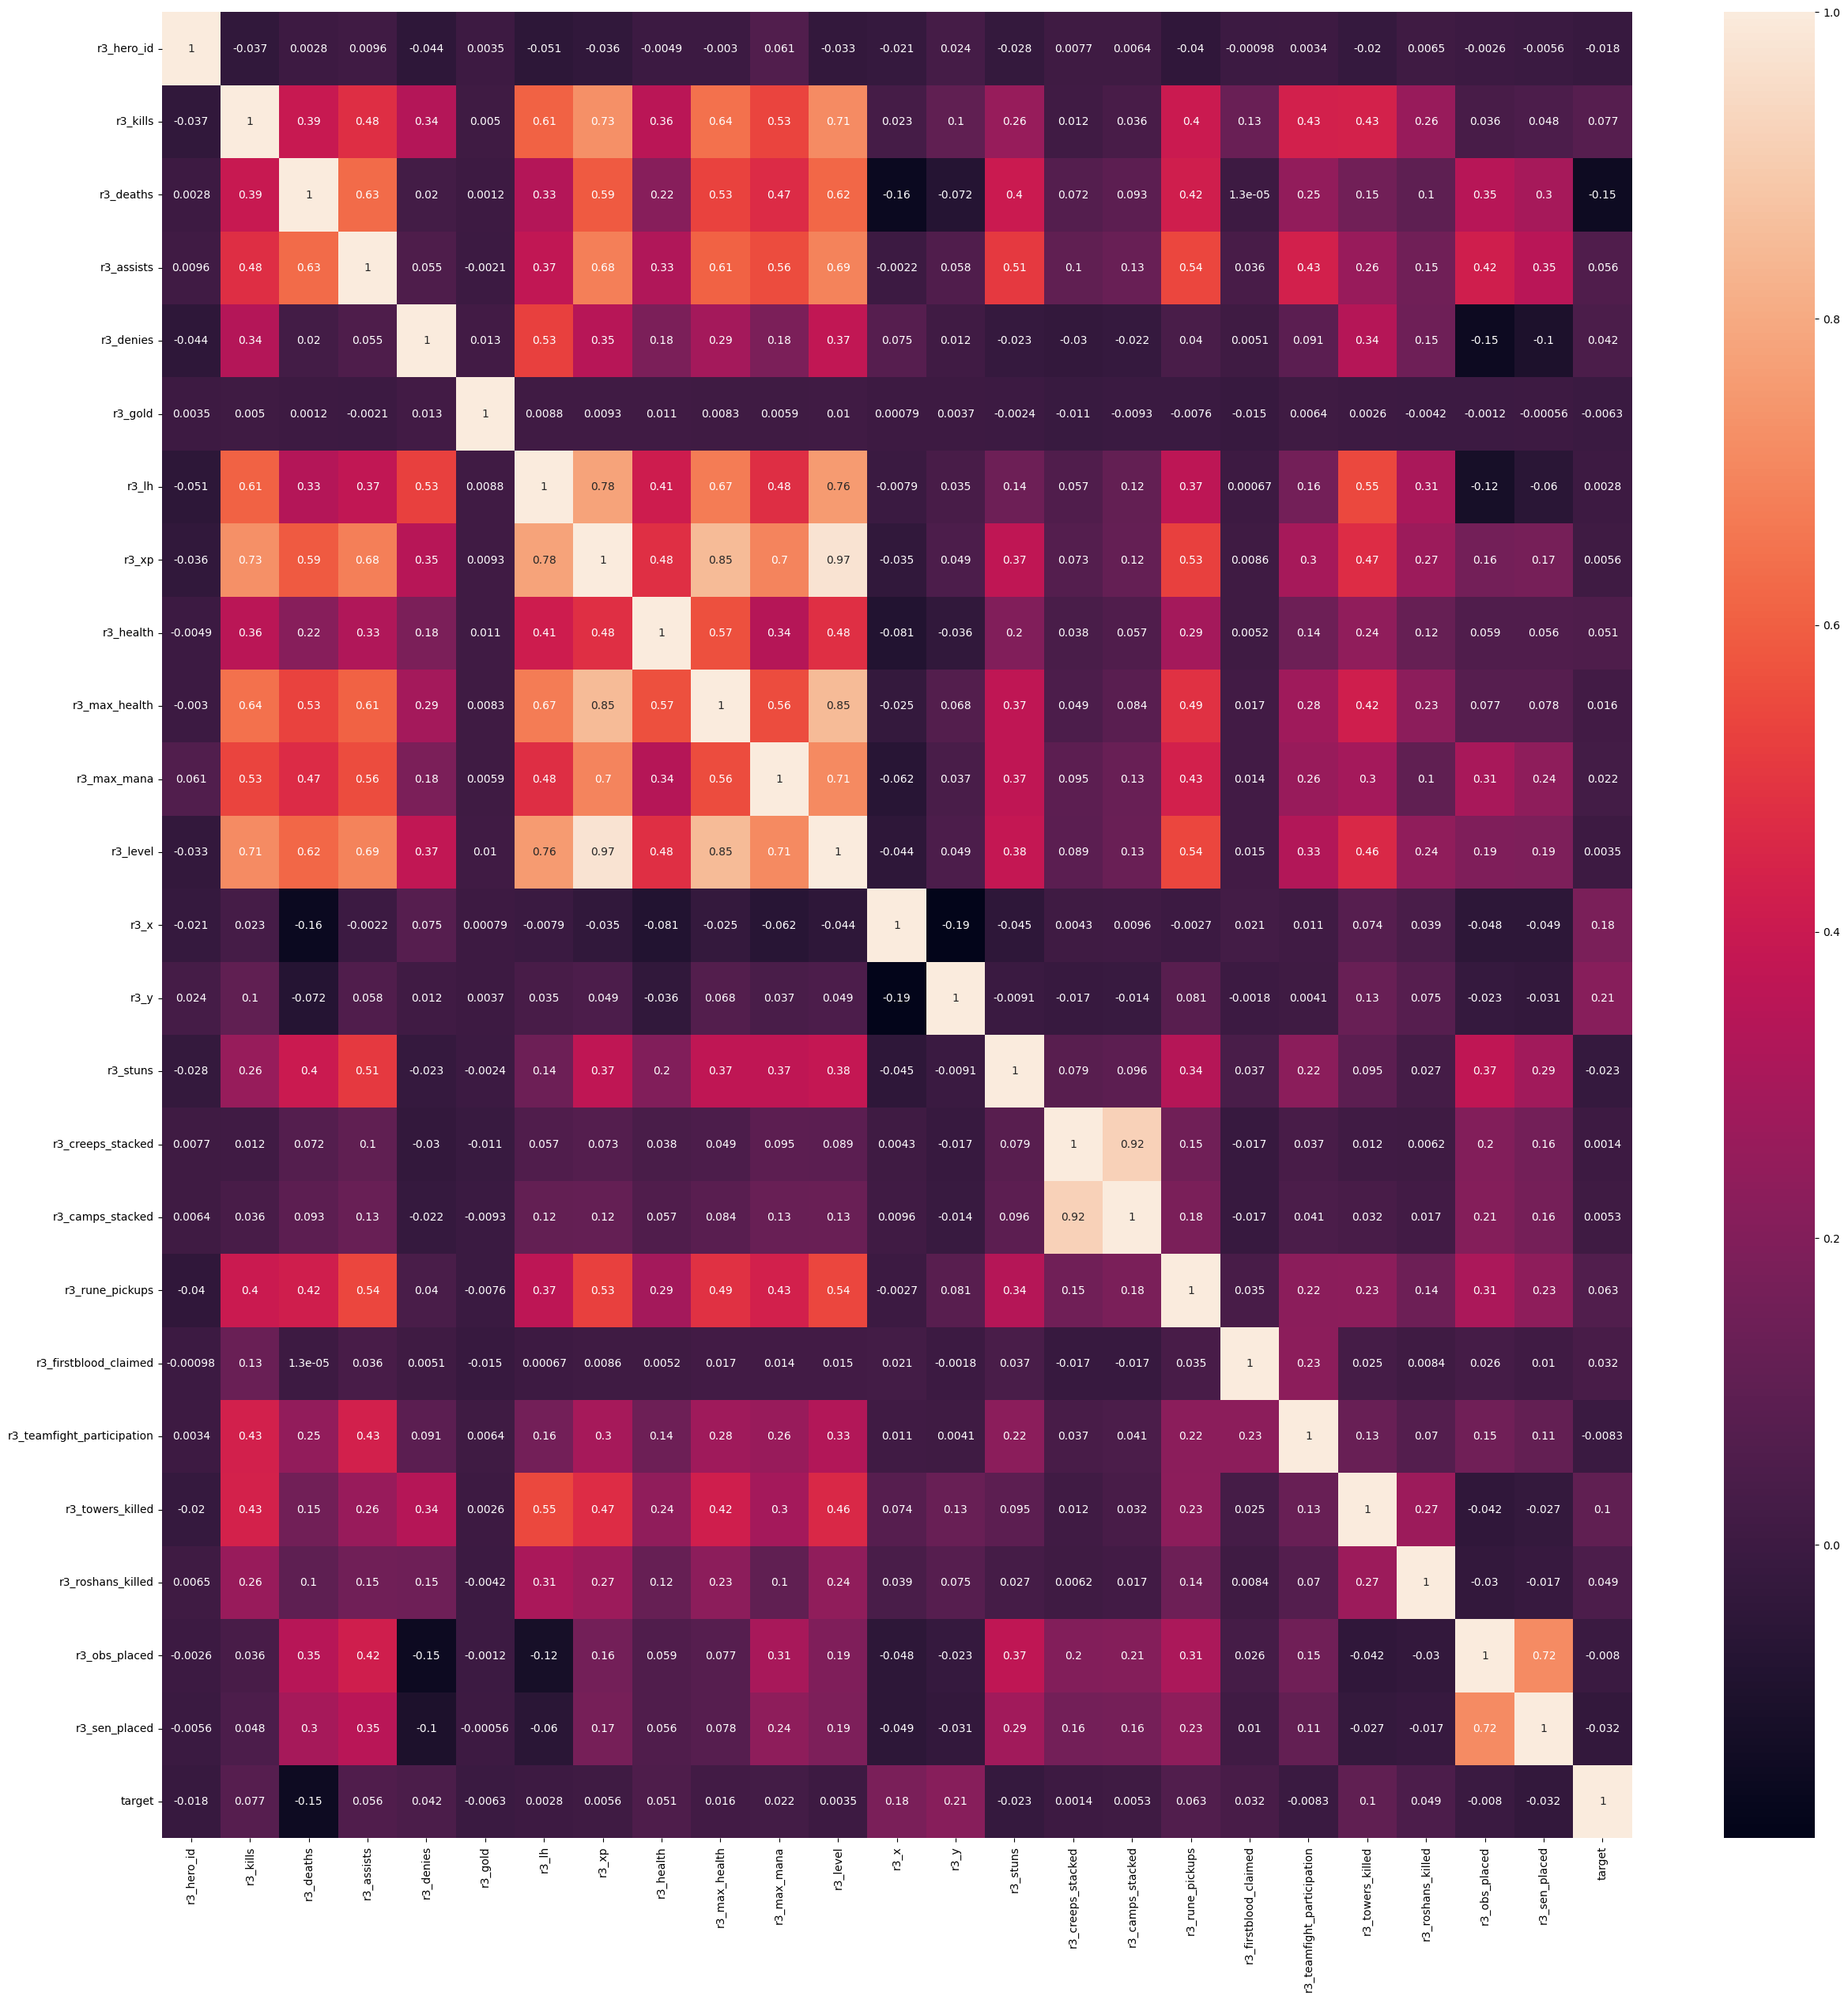

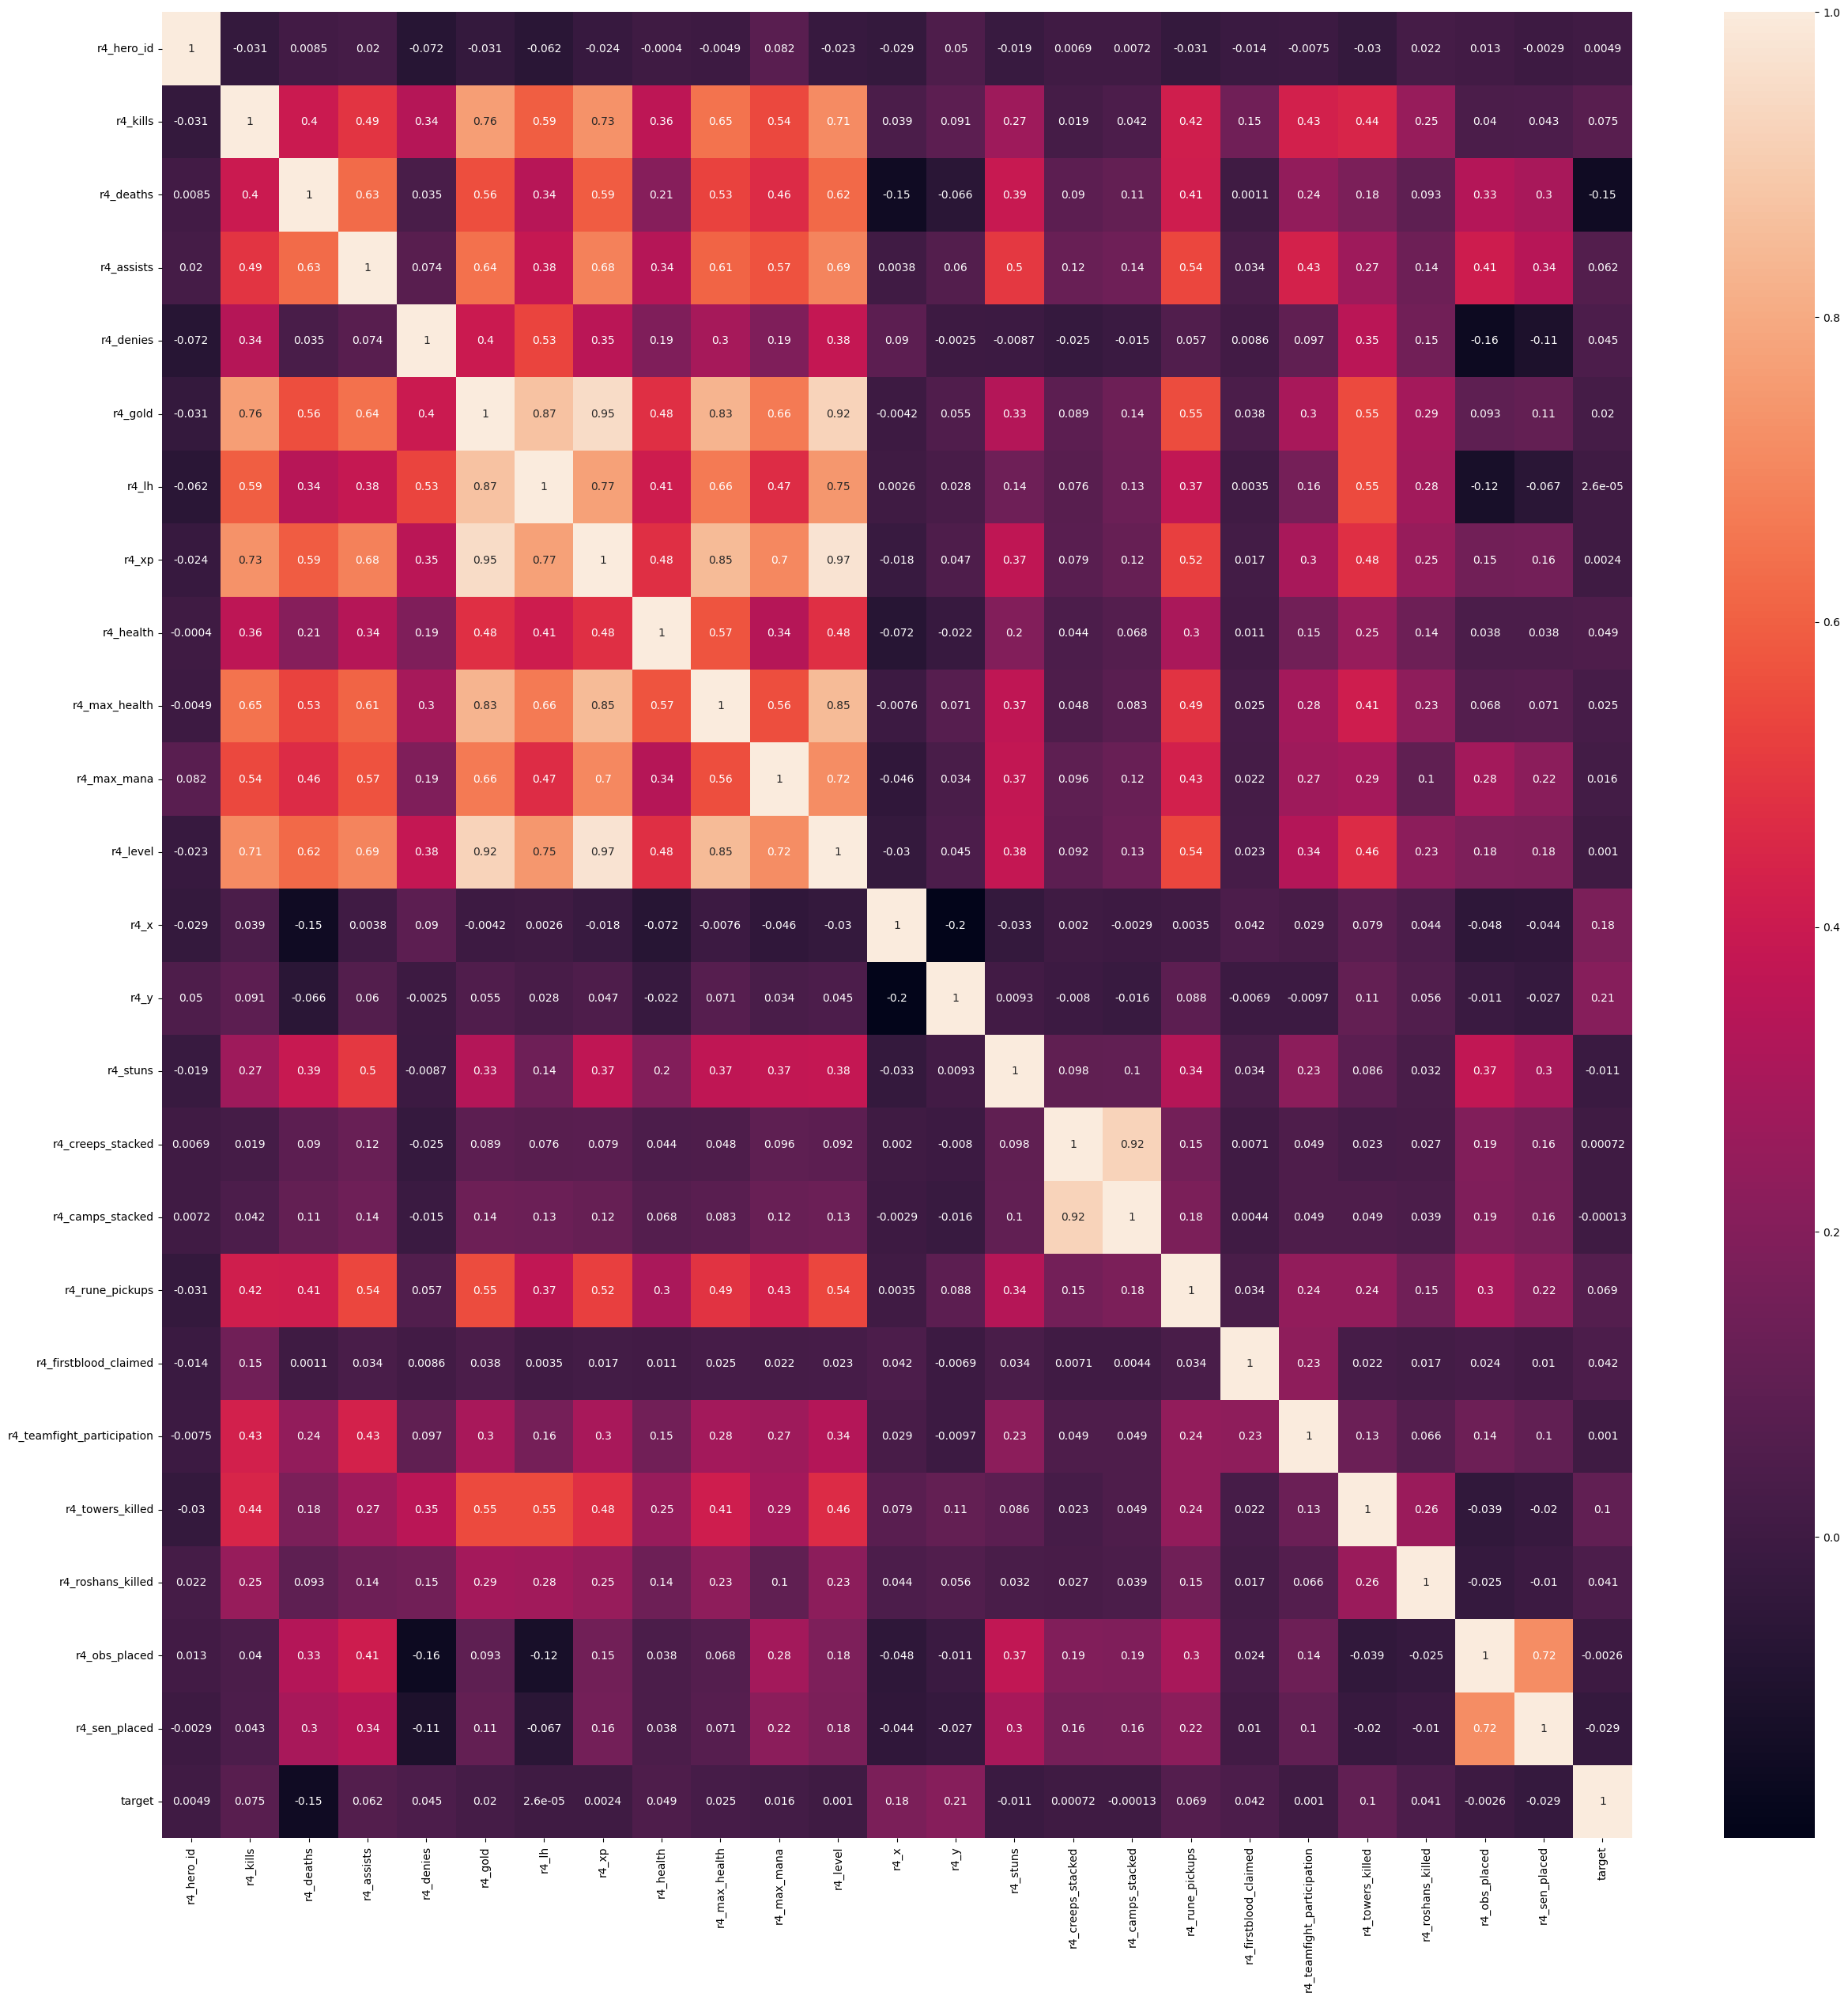

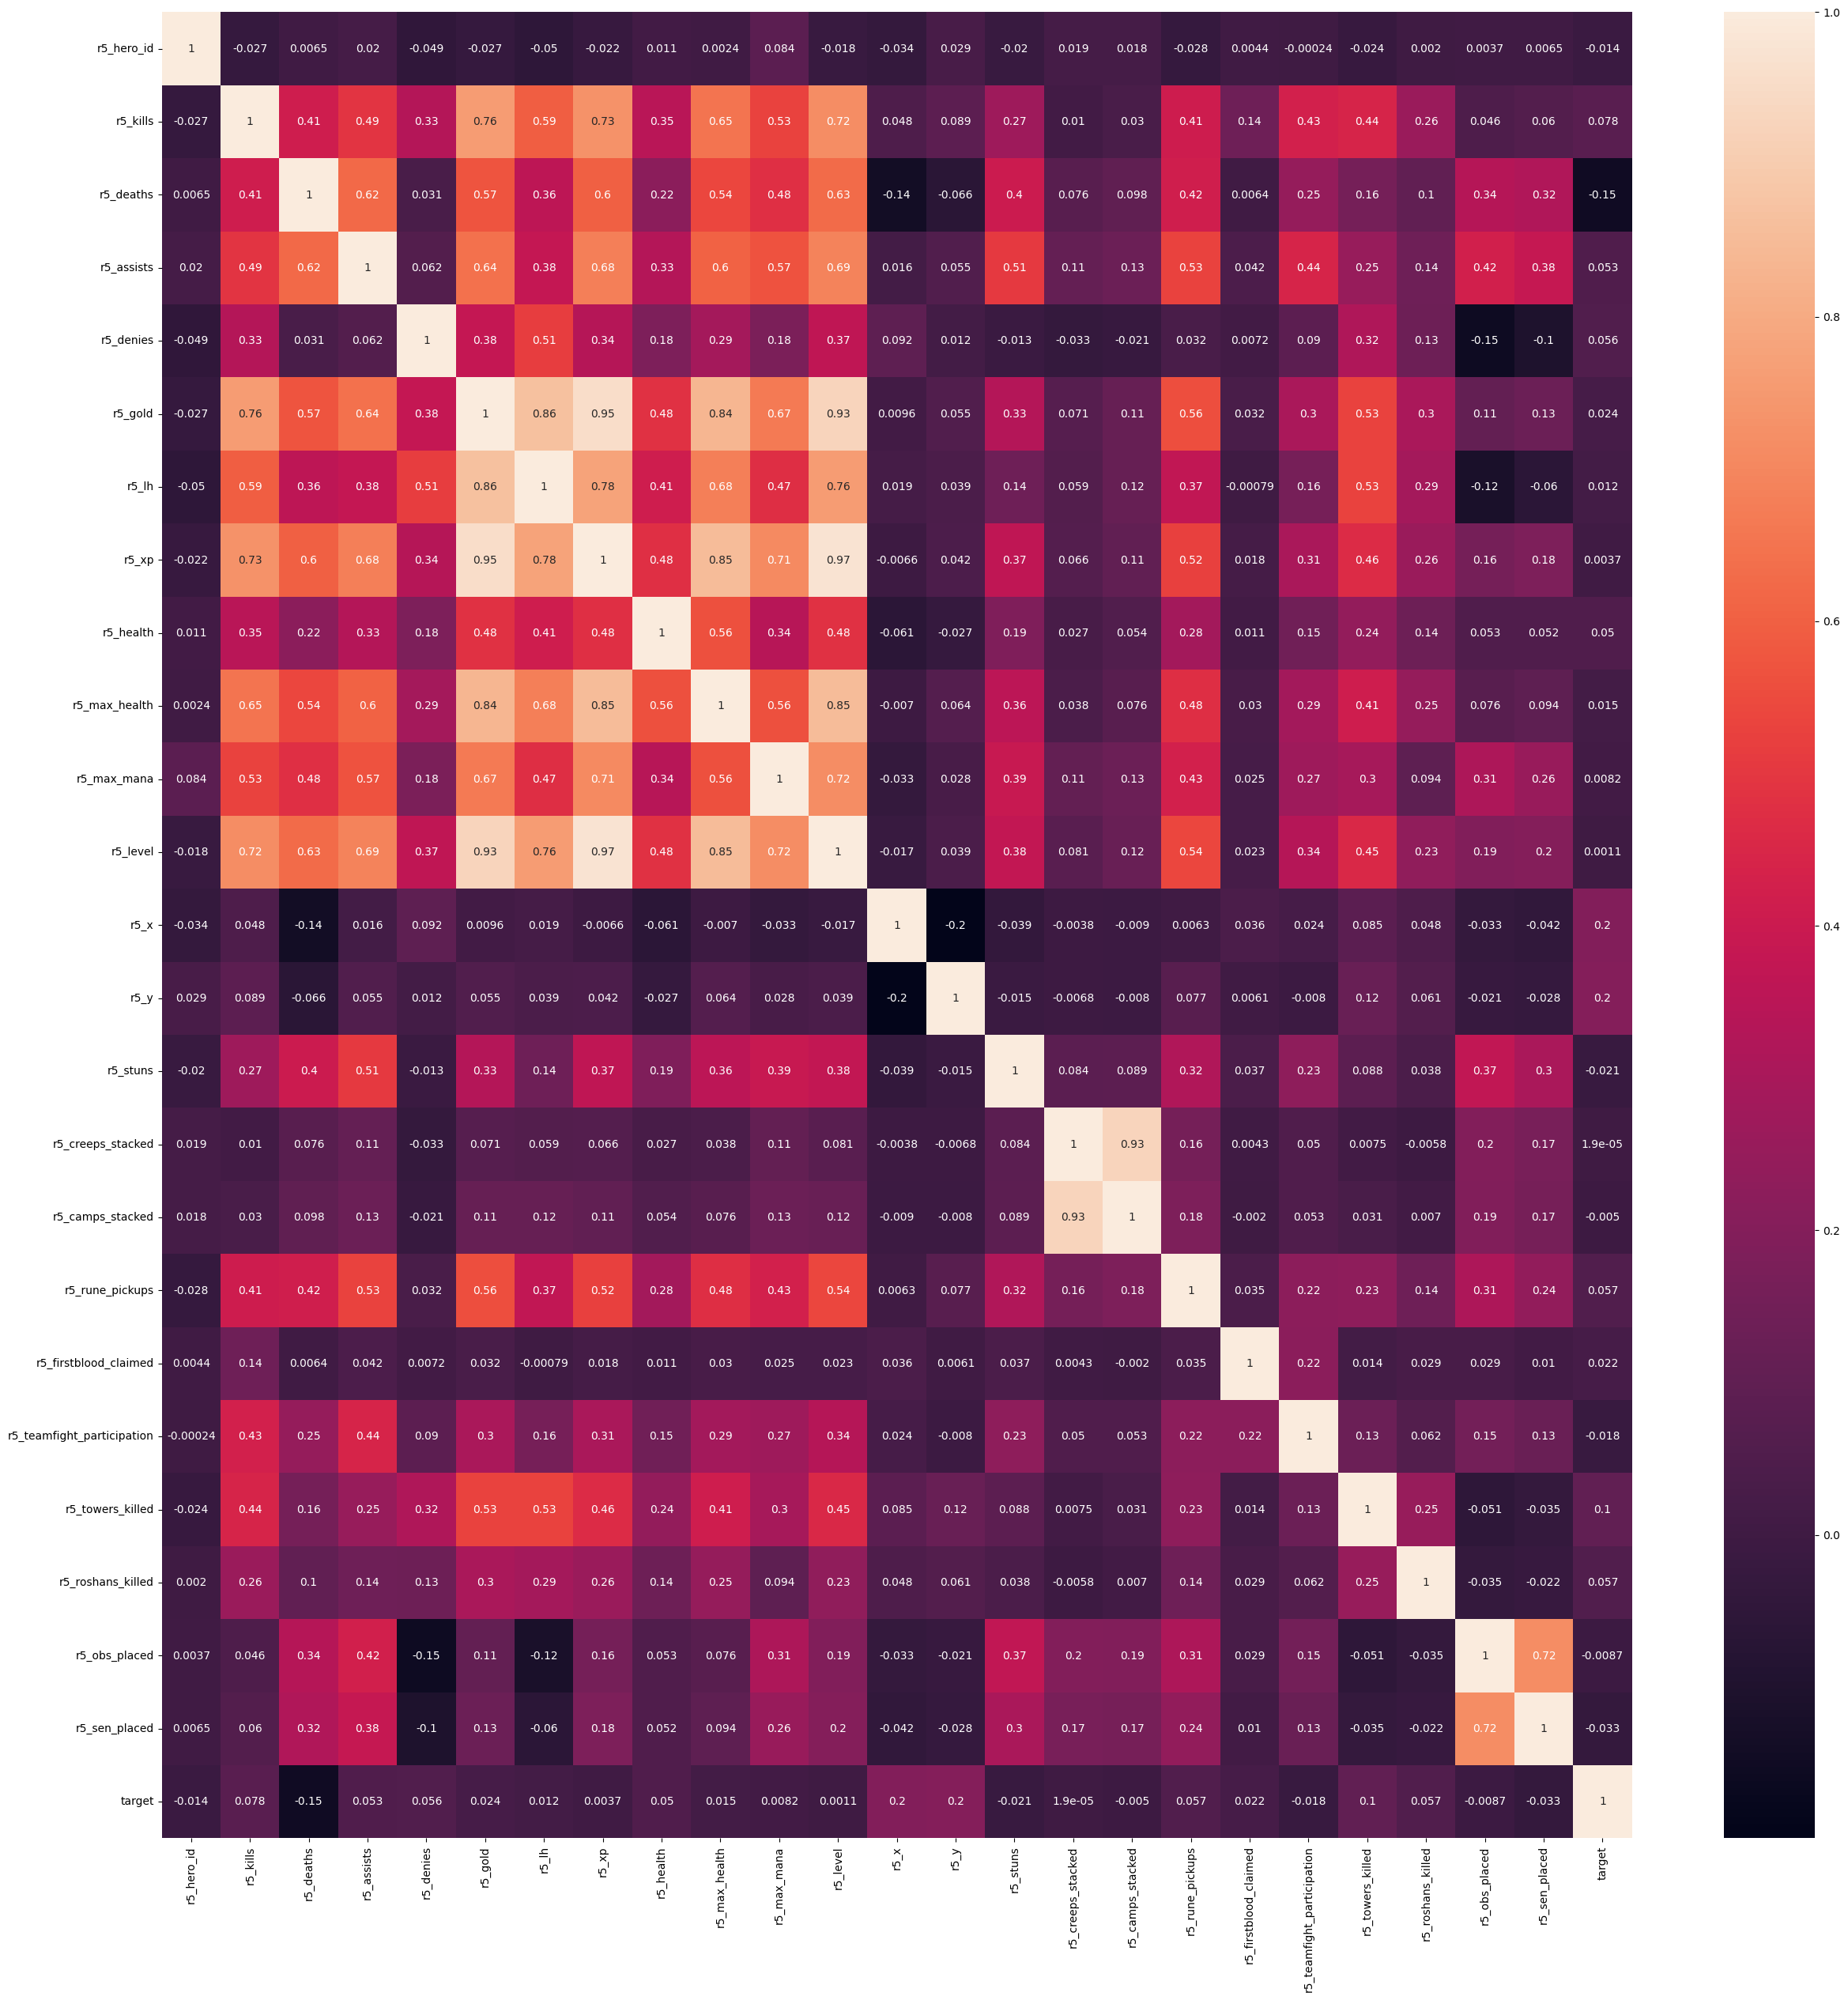

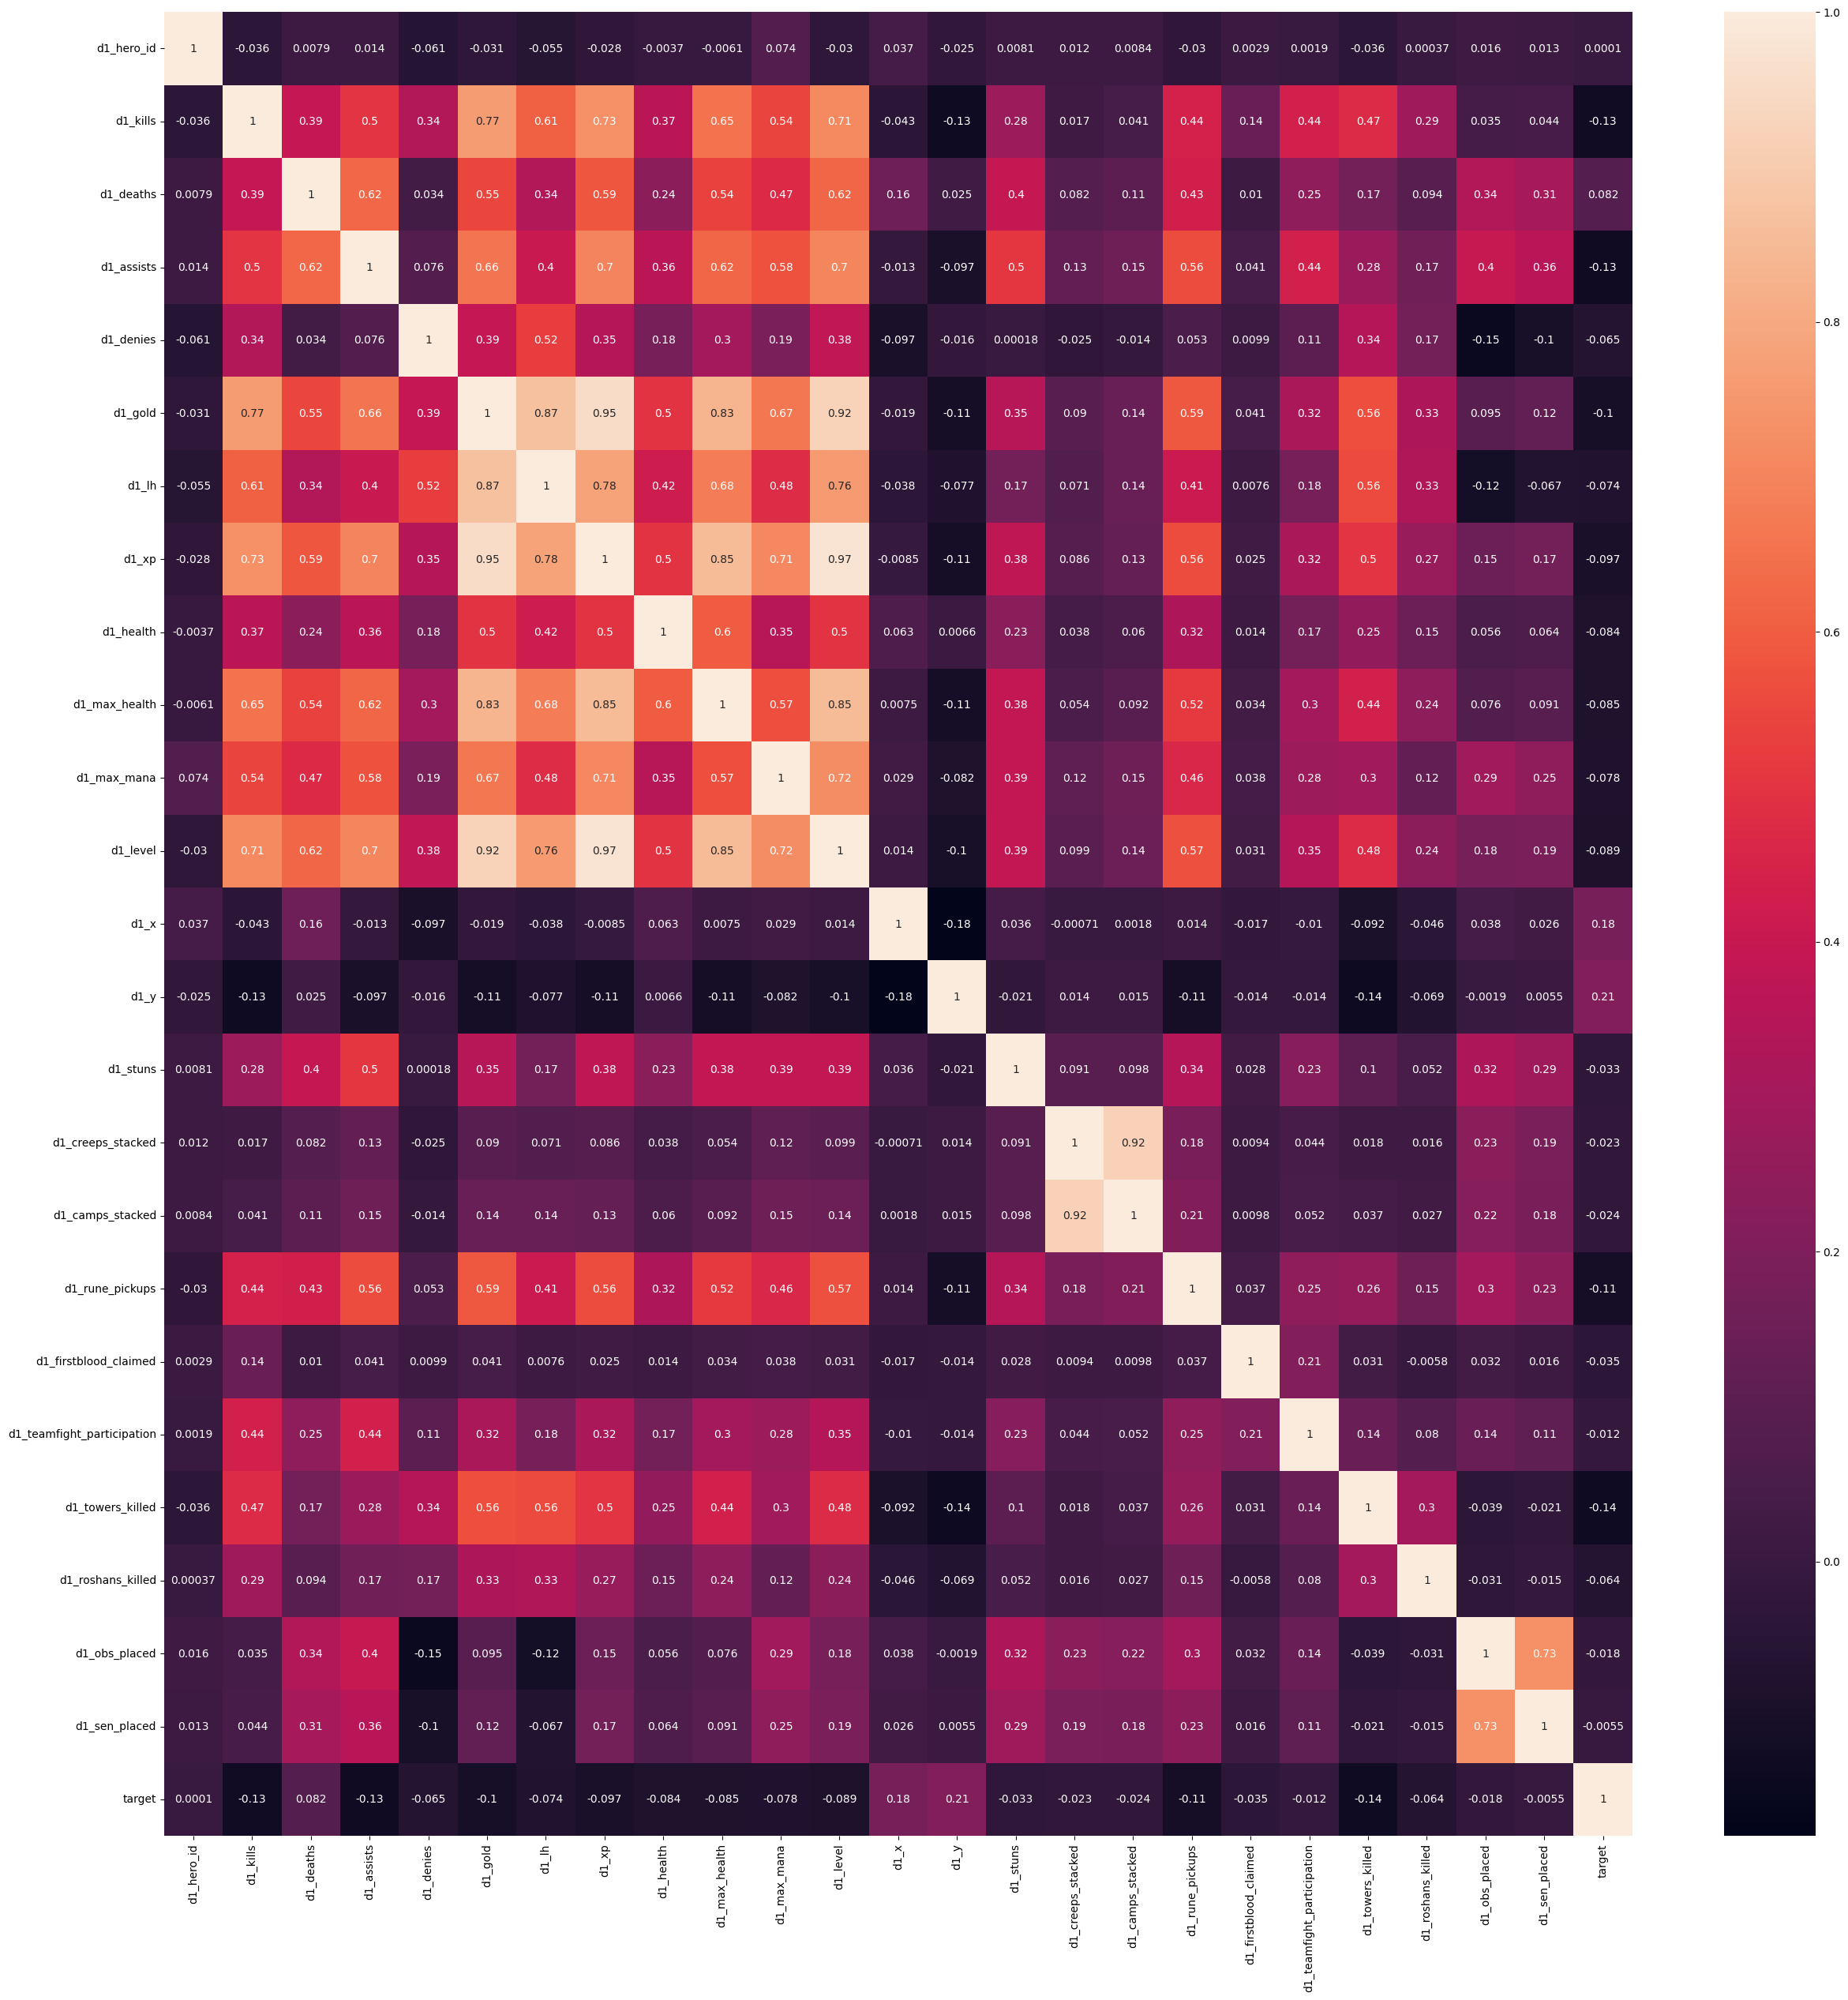

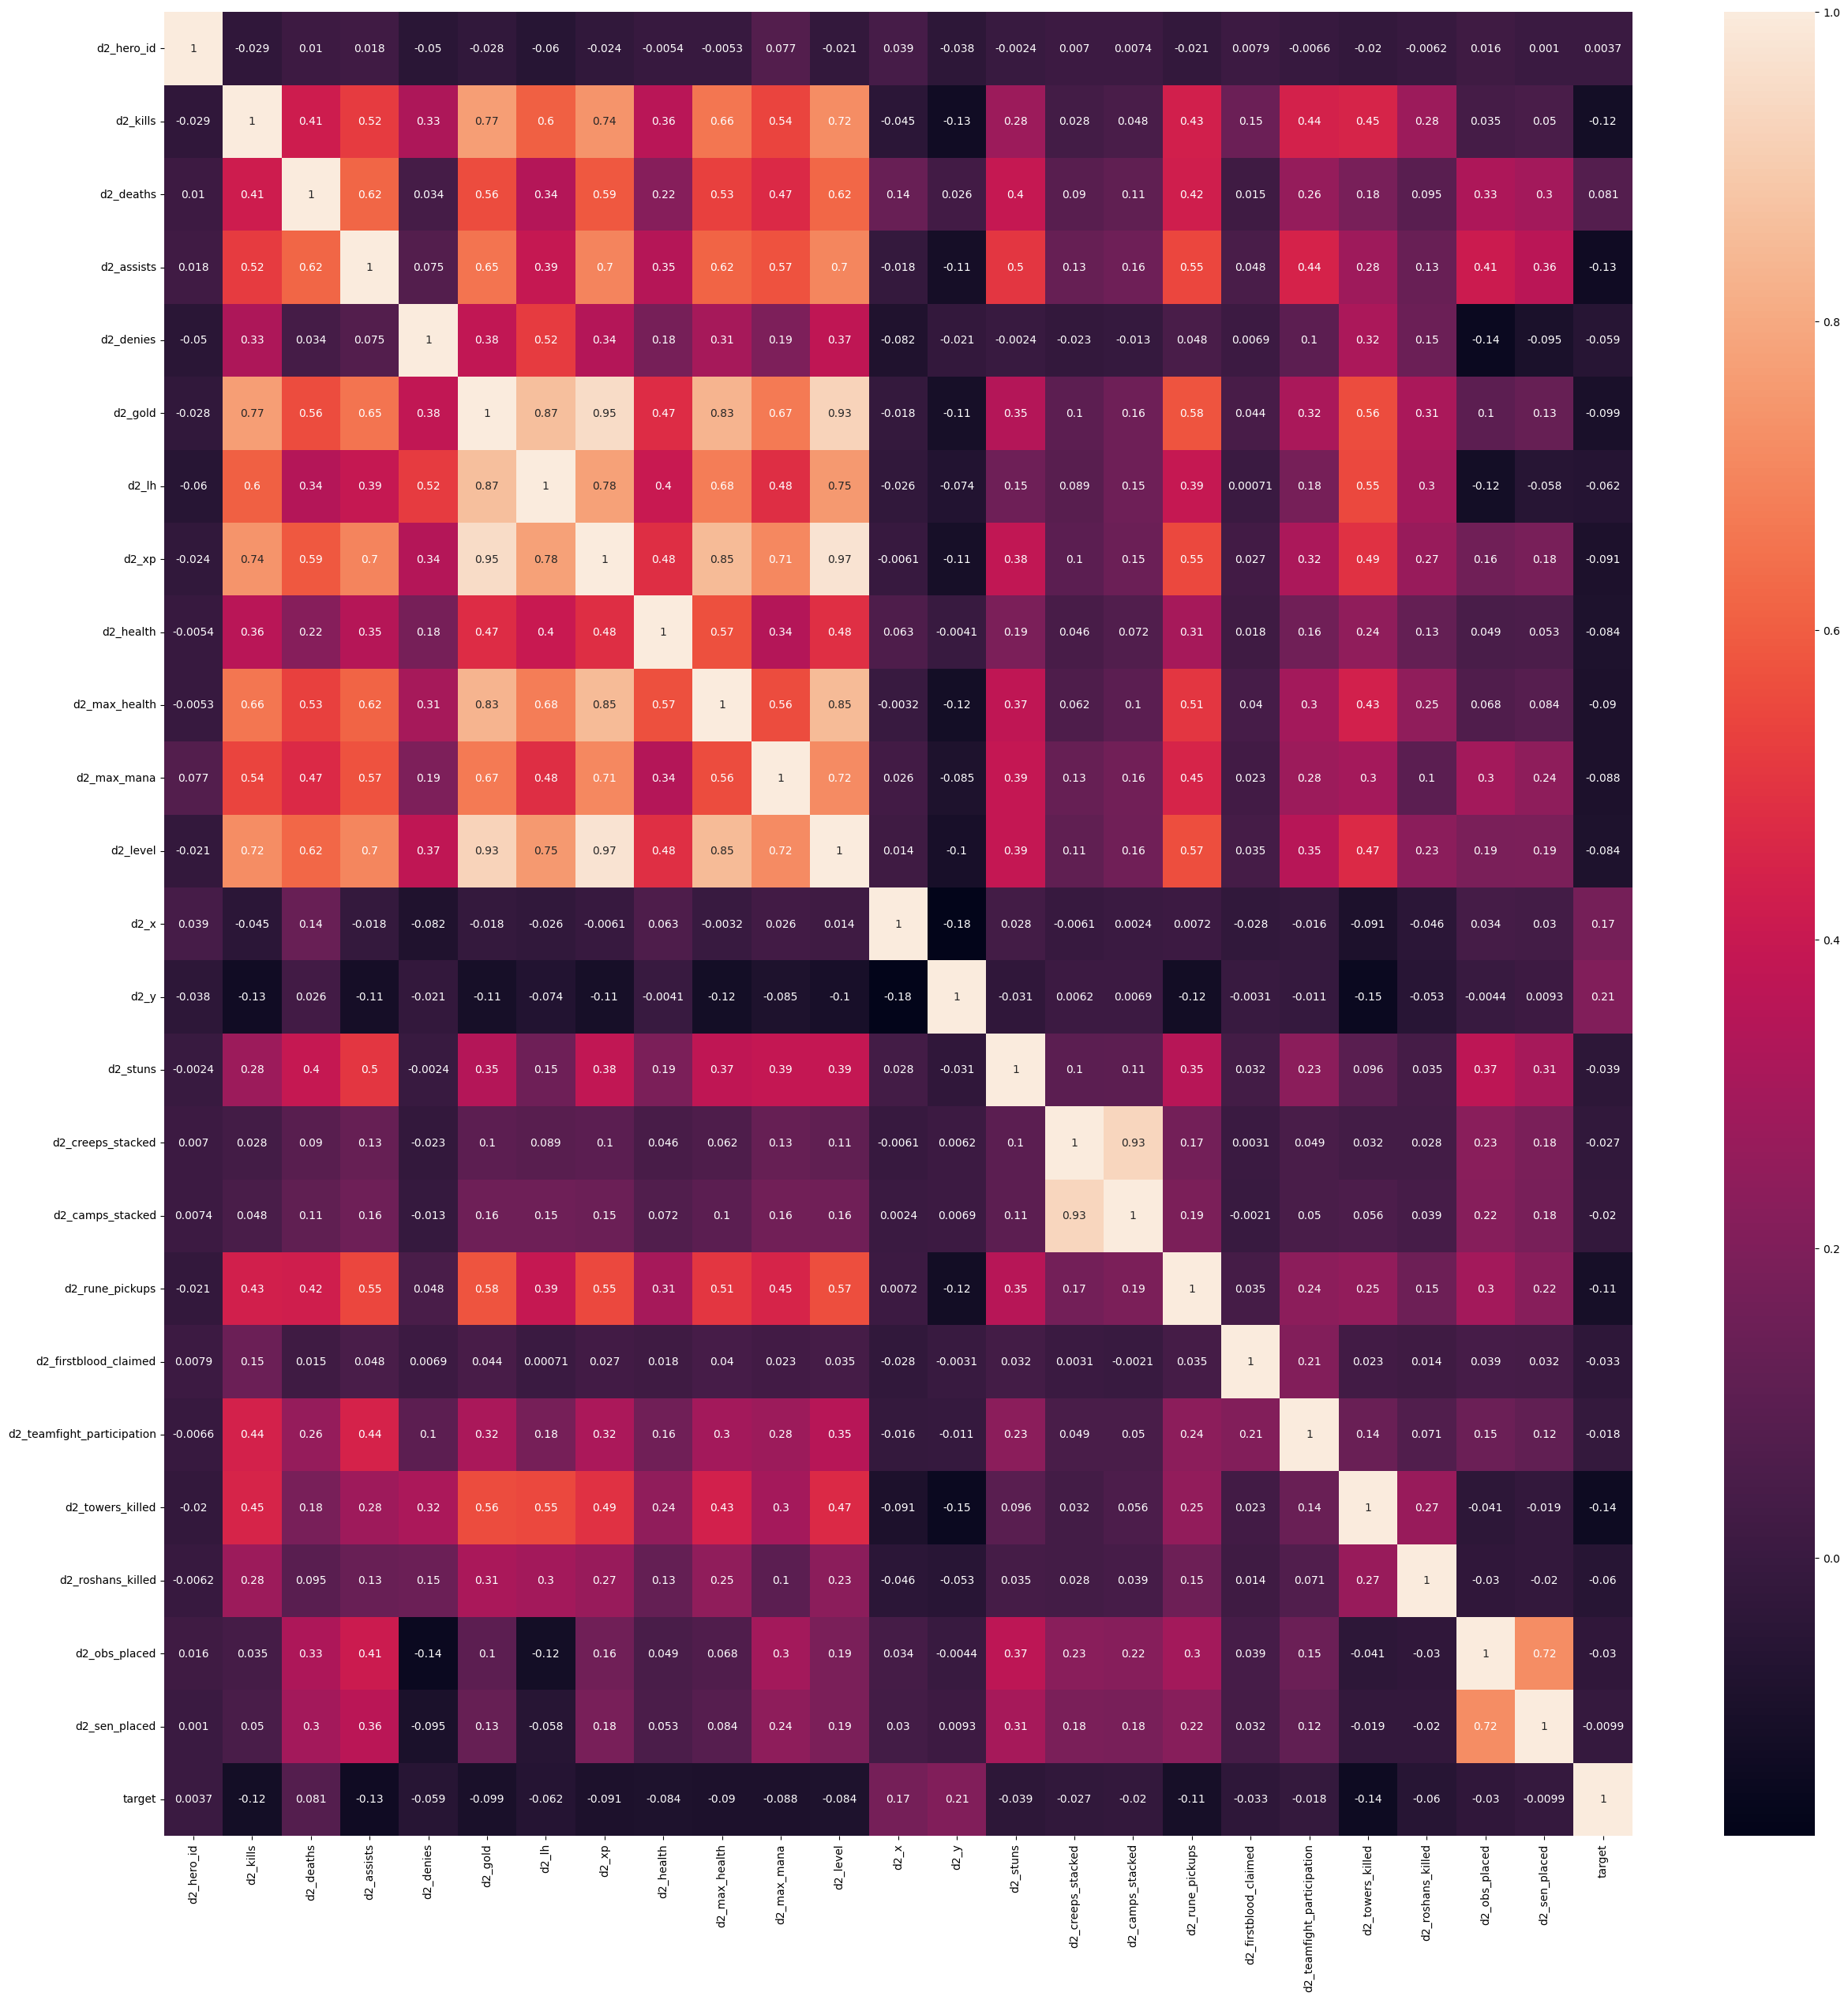

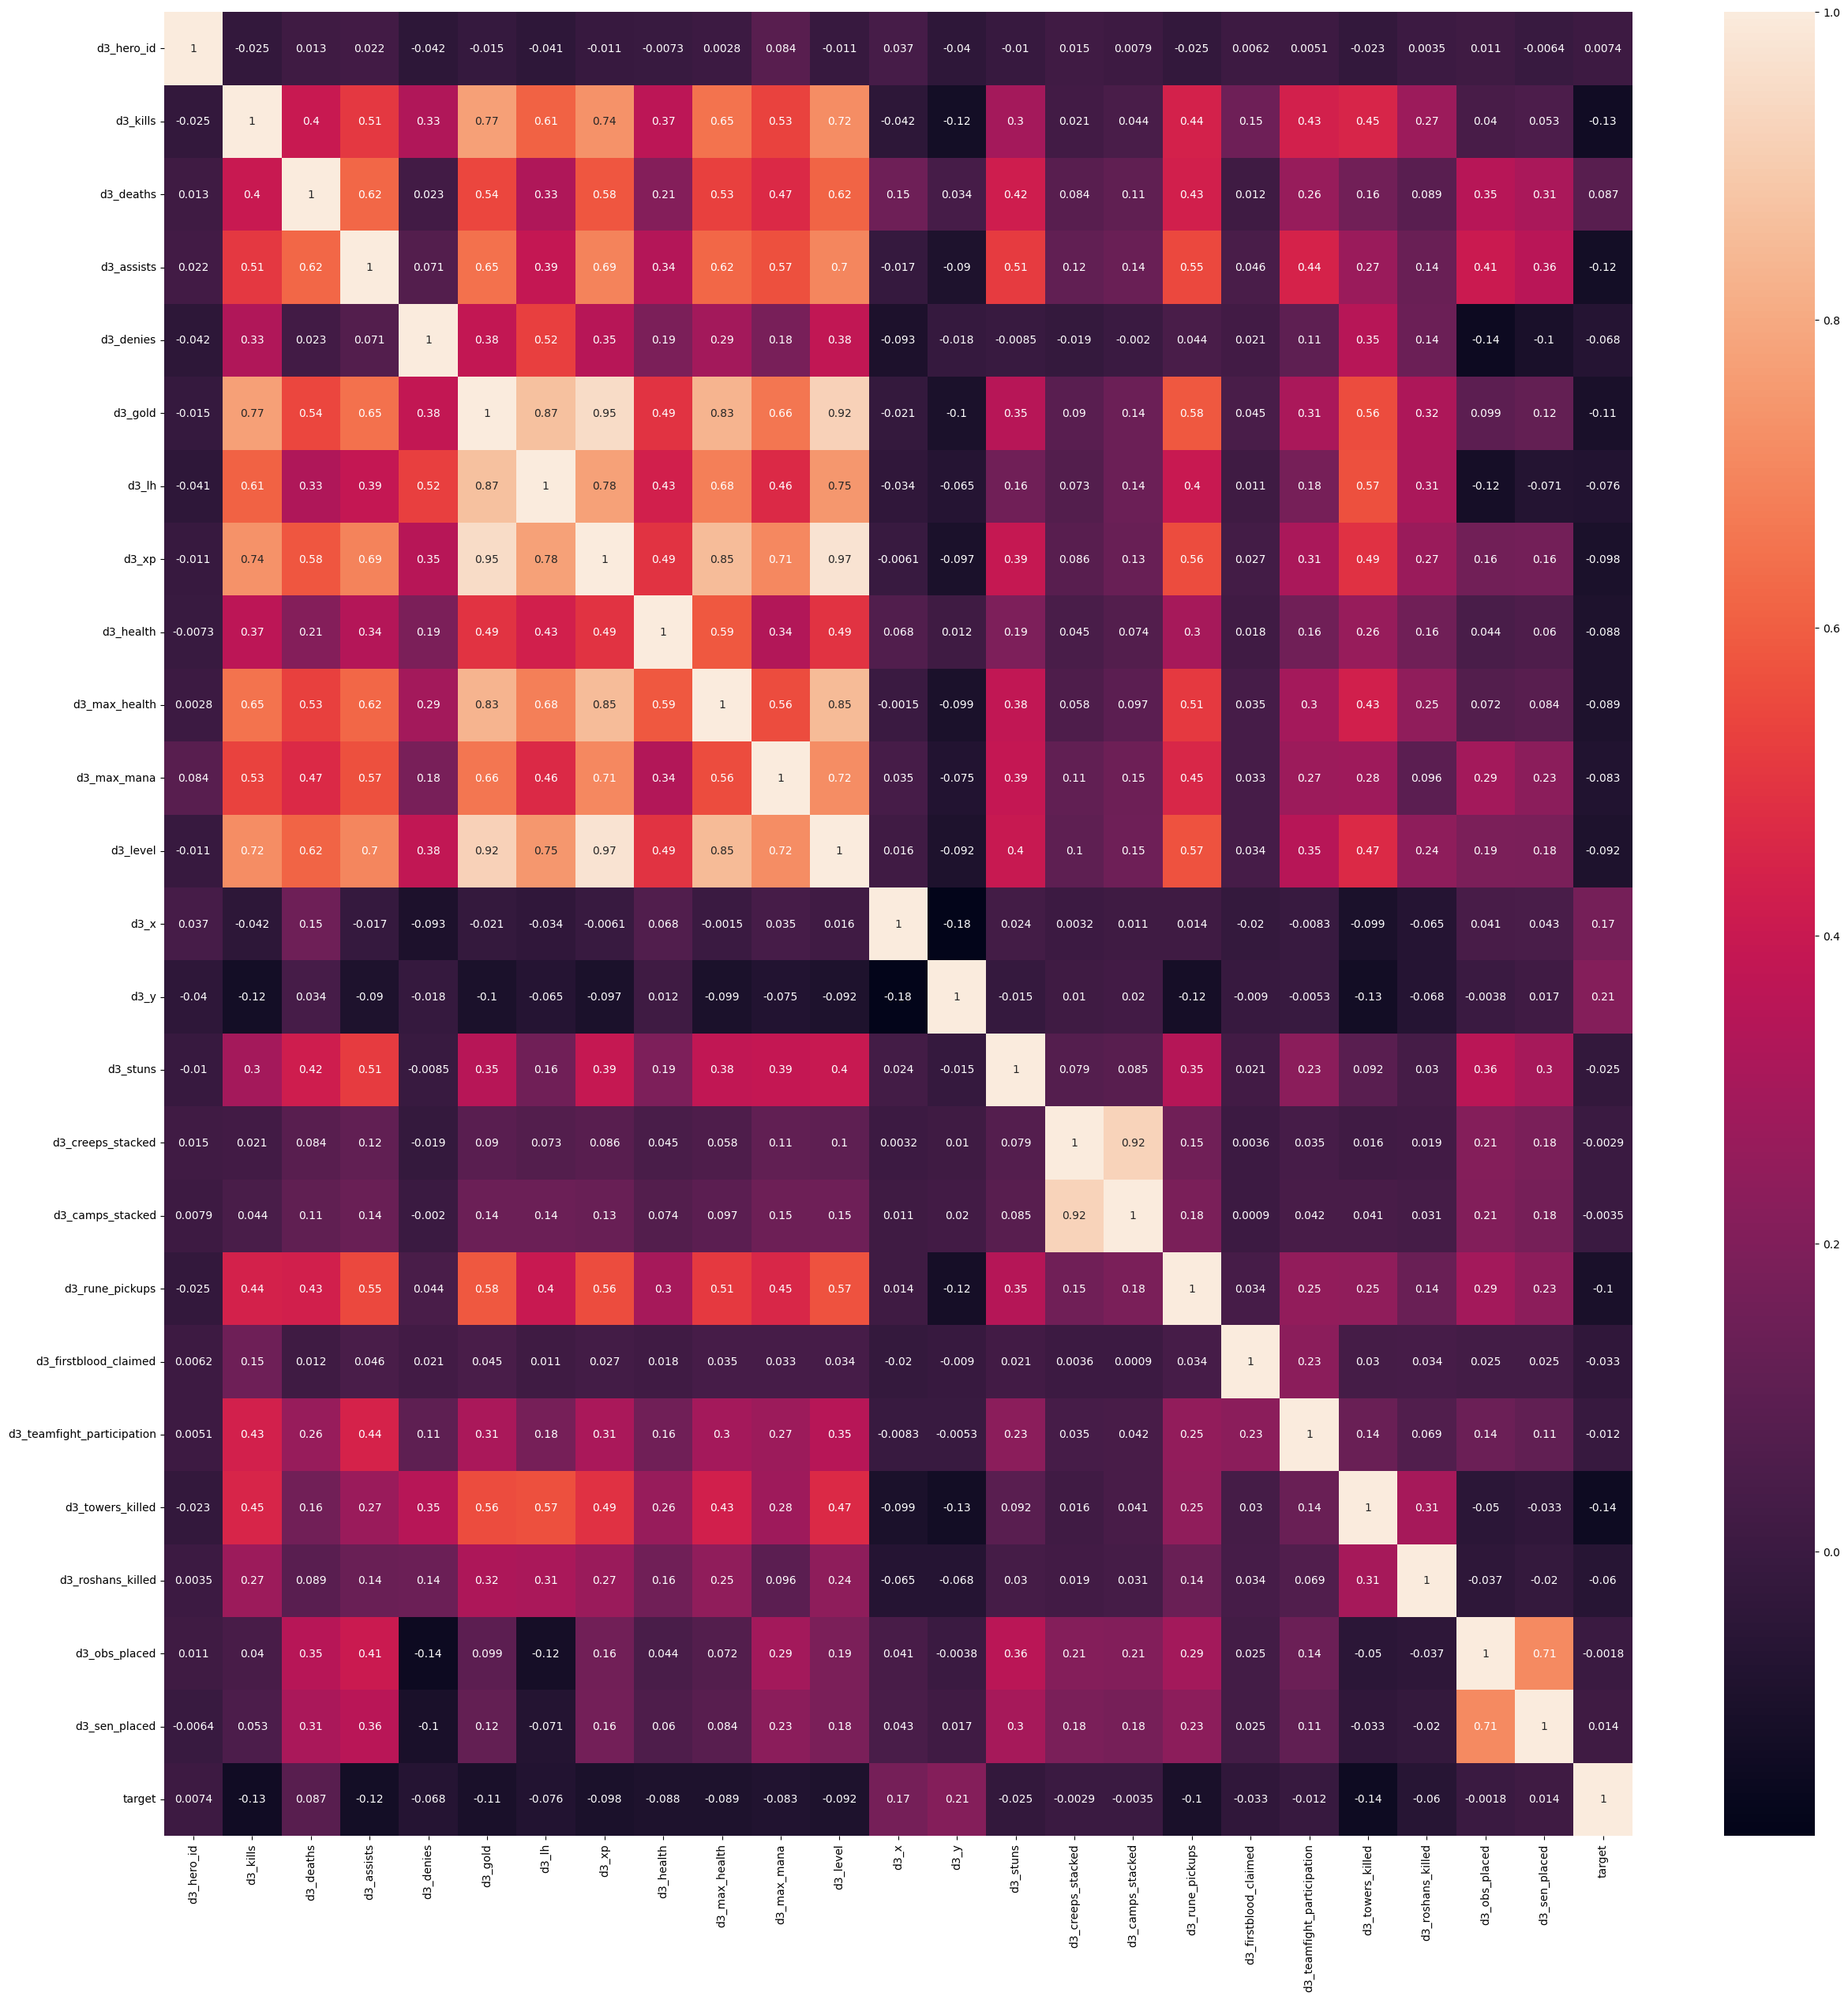

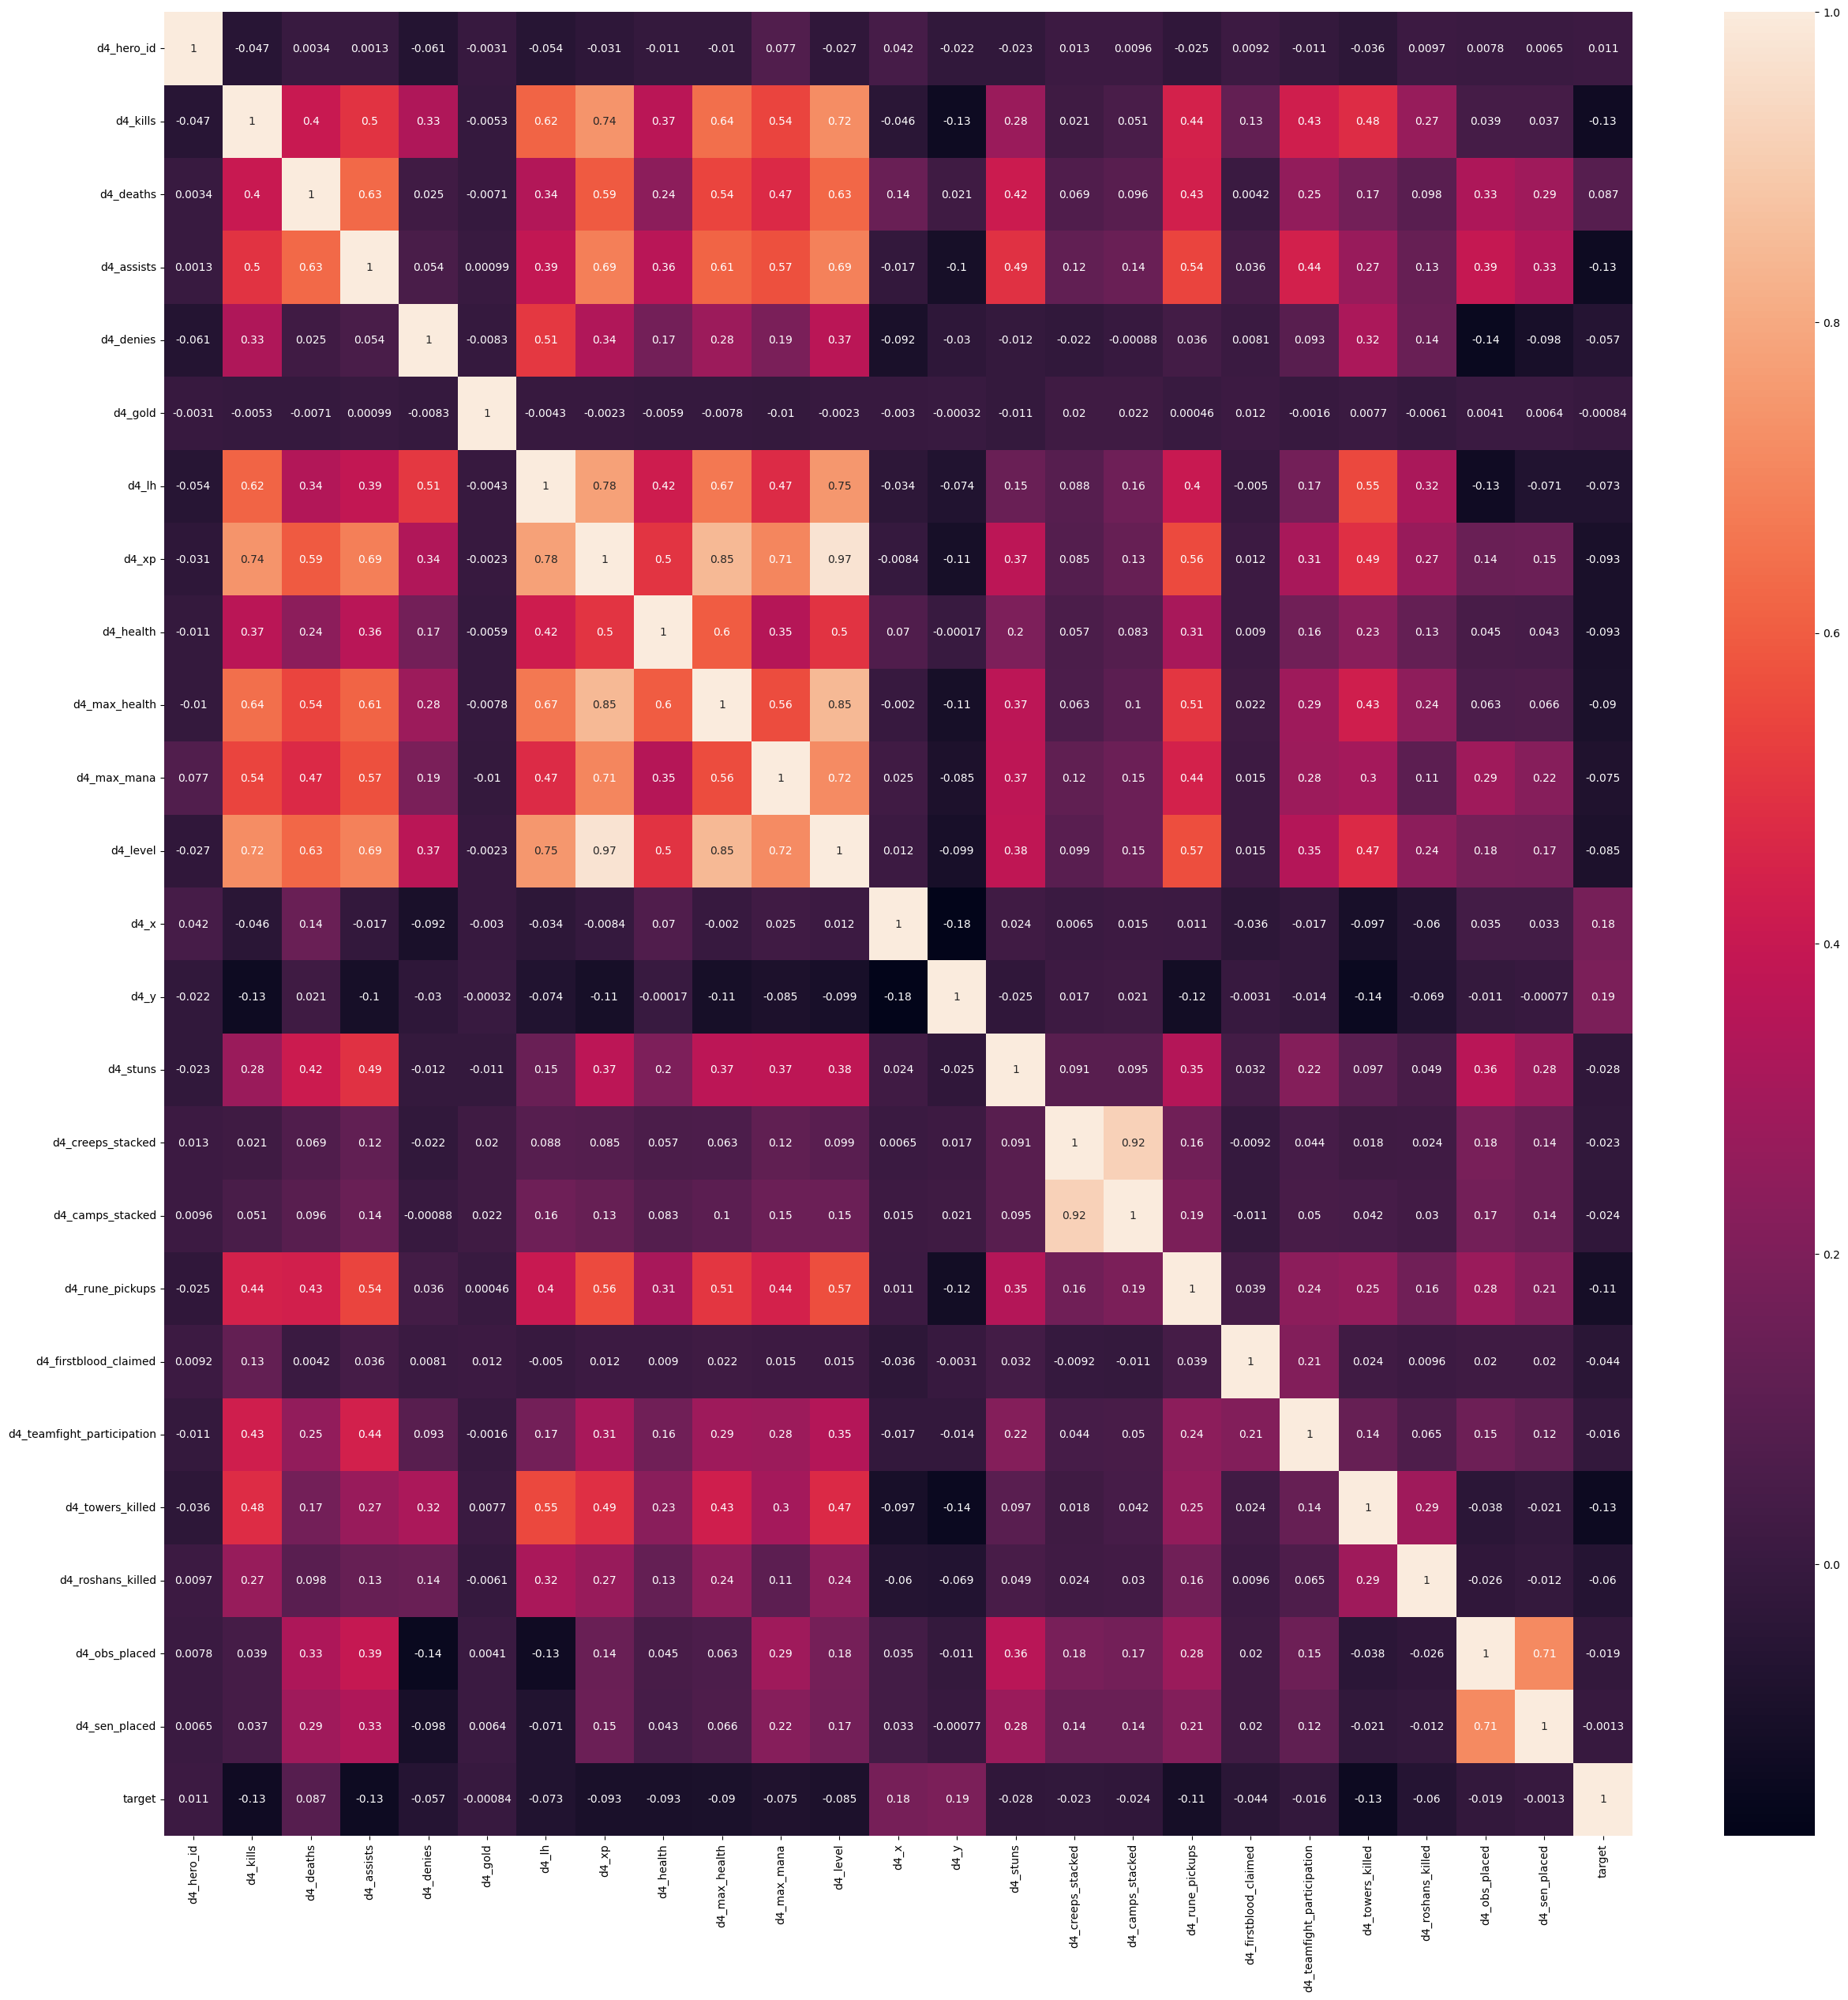

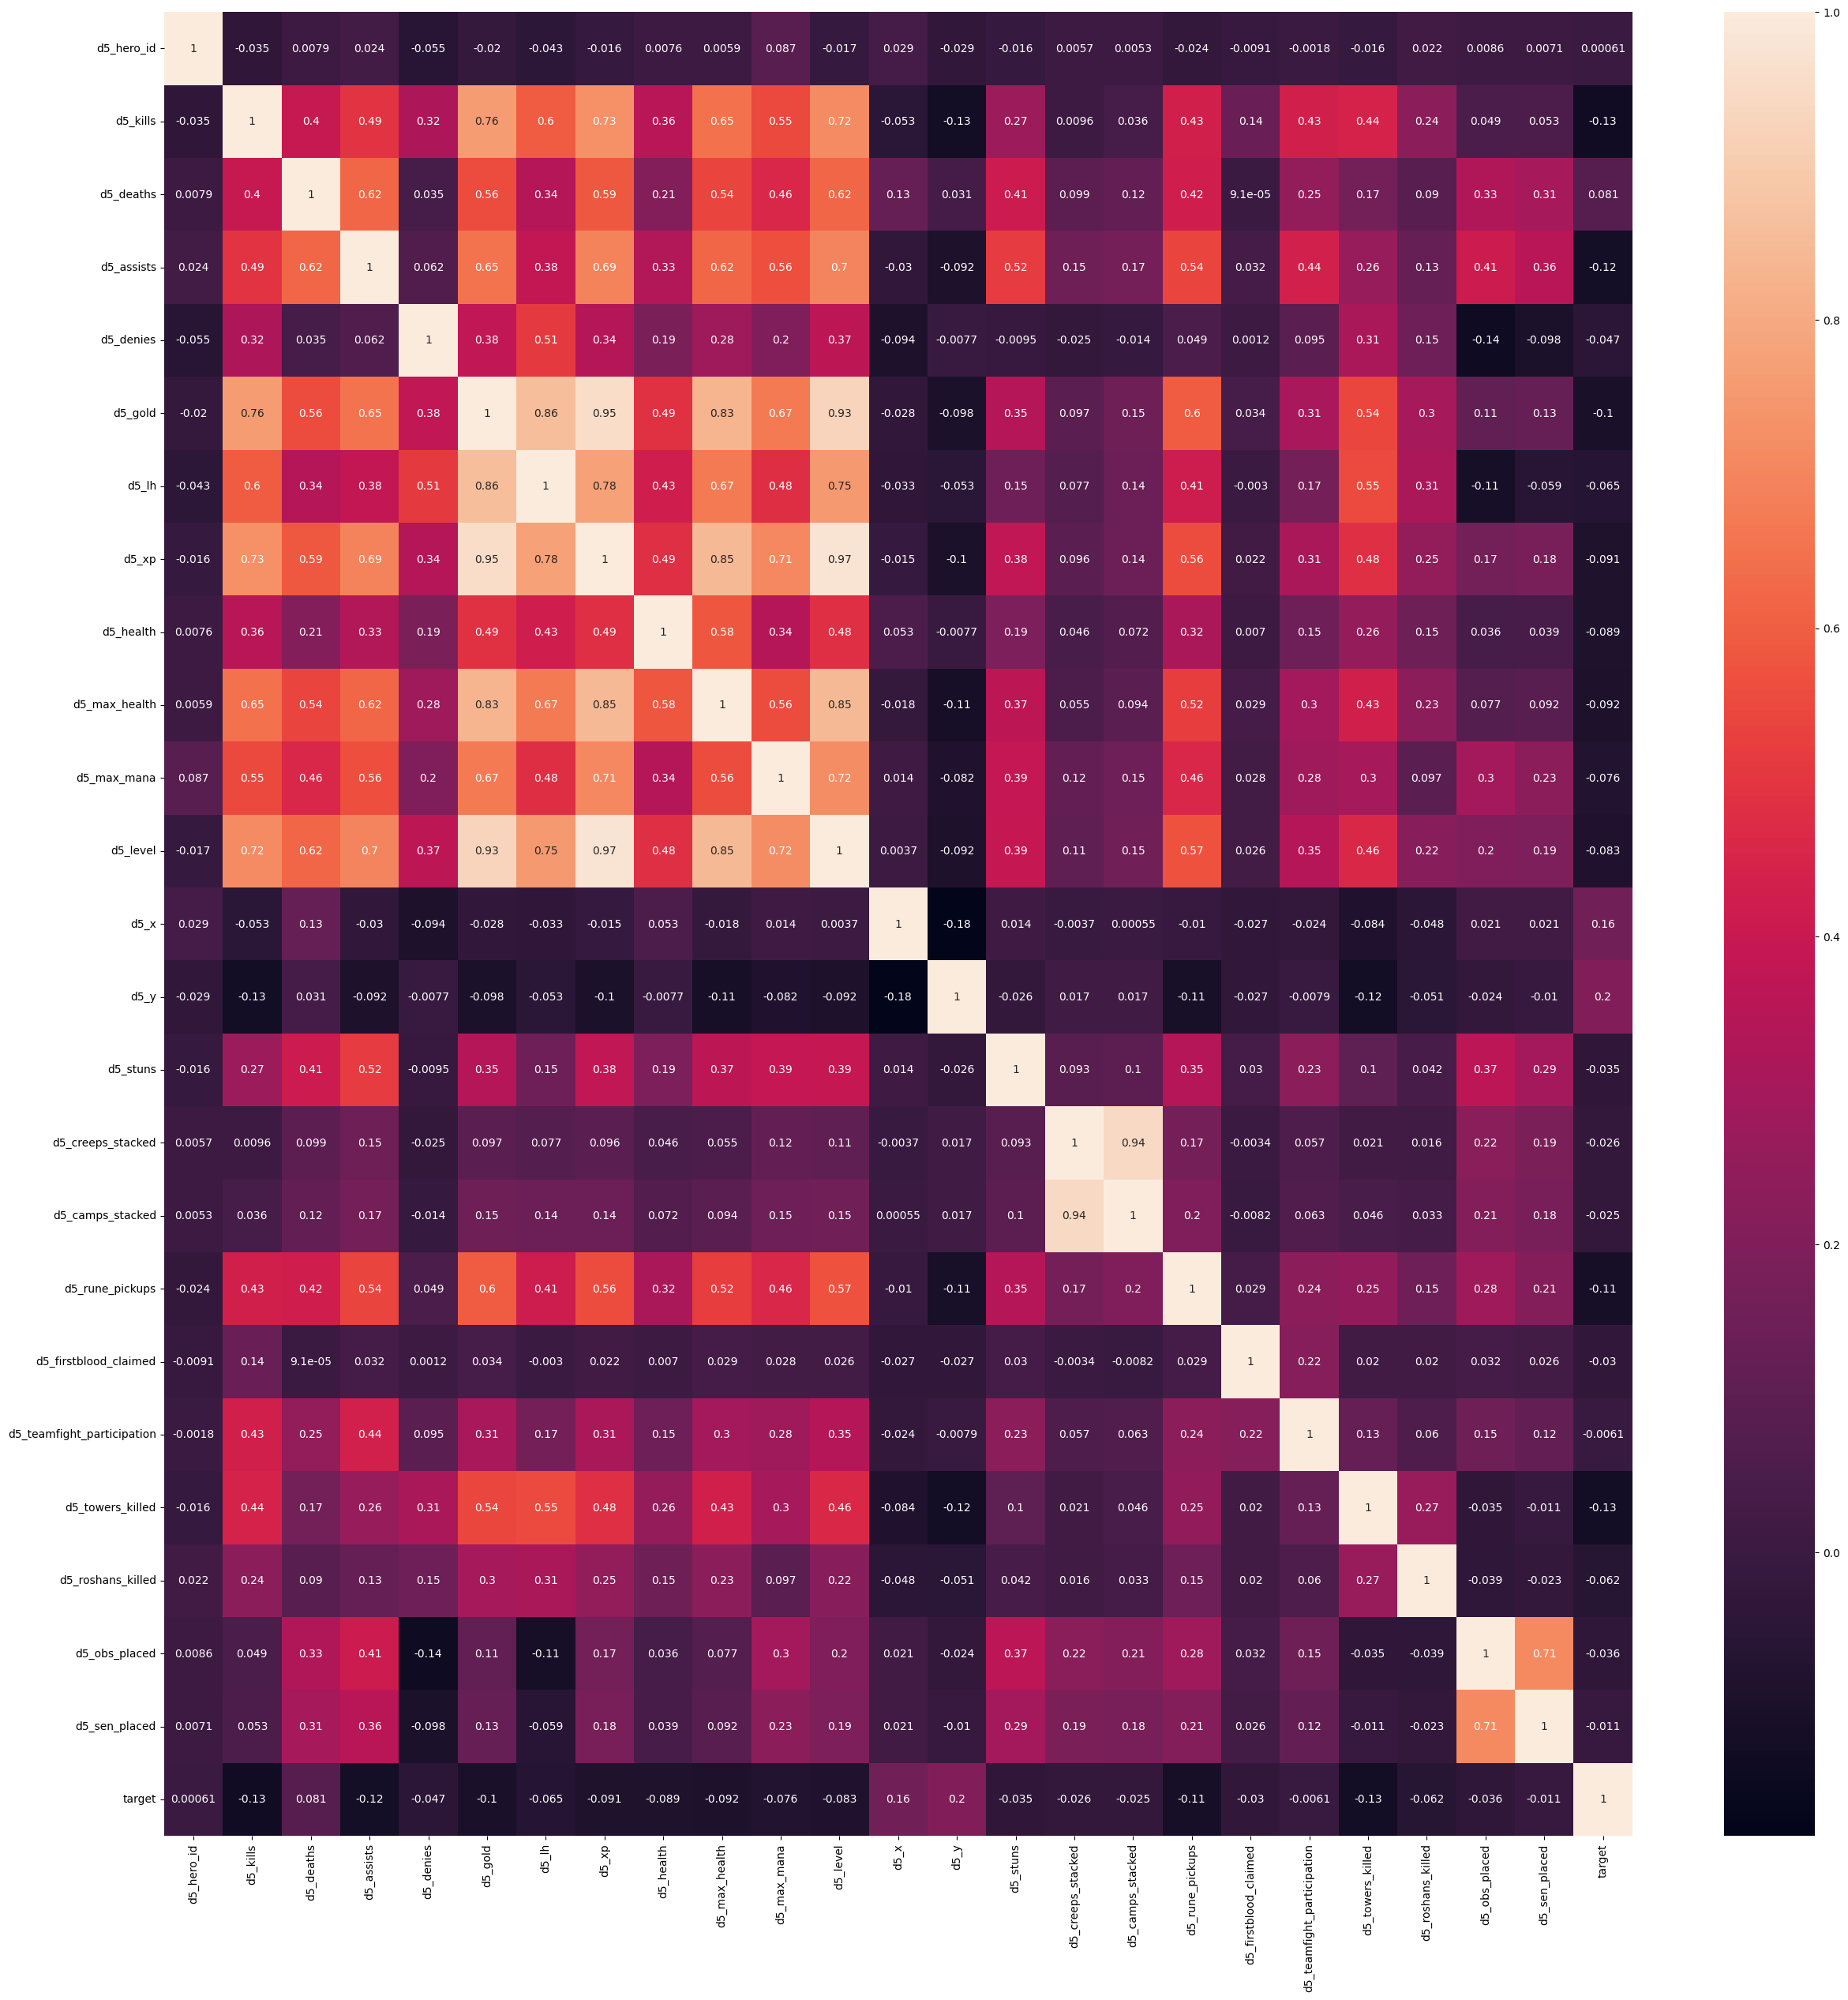

In [55]:
columns = get_columns_groups(df)
for key, val in columns.items():
    plt.figure(figsize= (30,30))
    valTarg = val
    valTarg.append("target")
    sns.heatmap(df[valTarg].corr(), annot = True)
    plt.show()